 A Decision Tree Classifier in Python. Below each of the methods, I've written a little demo to help explain what it does.

In [2]:
# For Python 2 / 3 compatability
from __future__ import print_function

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [4]:
# reading csv file
df = pd.read_csv("cardio_train.csv", delimiter= ";")

In [5]:
df.head(10)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0       0       0  
6     0       1       0  
7     0       1       1  
8     0       1       0  
9     0       0       0

In [6]:
df.drop('id', inplace=True, axis=1)

In [7]:
list(df)[:-1]

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [8]:
df['age'] = np.ceil(df['age']/365)

## Visualizing the Data


In [9]:
df.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      53.837914      1.349571    164.359229     74.205690    128.817286   
std        6.766821      0.476838      8.210126     14.395757    154.011419   
min       30.000000      1.000000     55.000000     10.000000   -150.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       59.000000      2.000000    170.000000     82.000000    140.000000   
max       65.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [10]:
# select the wanted column
df_text_genre = df[list(df)]
print(df_text_genre)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      51.0       2     168    62.0    110     80            1     1      0   
1      56.0       1     156    85.0    140     90            3     1      0   
2      52.0       1     165    64.0    130     70            3     1      0   
3      49.0       2     169    82.0    150    100            1     1      0   
4      48.0       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  53.0       2     168    76.0    120     80            1     1      1   
69996  62.0       1     158   126.0    140     90            2     2      0   
69997  53.0       2     183   105.0    180     90            3     1      0   
69998  62.0       1     163    72.0    135     80            1     2      0   
69999  57.0       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1  

In [11]:
train, test = train_test_split(df_text_genre, test_size = 0.1, random_state=42)

In [12]:
print(train)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
37194  44.0       2     170    75.0    150     80            1     1      1   
6265   64.0       2     162    73.0    160     90            1     1      0   
54886  65.0       1     169    74.0    120     80            1     1      0   
860    50.0       1     167    70.0    120     80            1     1      0   
15795  42.0       2     177    64.0    120     80            1     1      0   

       alco  active  cardio  
42878     0       1  

In [13]:
print(test)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
46730  60.0       1     156    64.0    140     80            2     1      0   
48393  60.0       1     170    85.0    160     90            1     1      0   
41416  64.0       1     151    90.0    130     80            1     1      0   
34506  55.0       1     159    97.0    120     80            1     1      0   
43725  51.0       1     164    68.0    120     80            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
23300  65.0       2     186    84.0    150     80            2     1      1   
55456  58.0       1     172    77.0    140     90            3     1      0   
14951  45.0       2     170    98.0    120     80            1     2      0   
34450  40.0       1     162    85.0    100     70            2     1      0   
41050  52.0       1     157    55.0    130     80            1     1      0   

       alco  active  cardio  
46730     0       1  

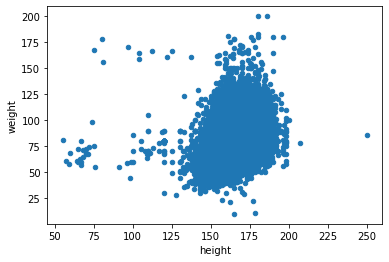

In [14]:
df.plot.scatter(x = 'height', y = 'weight', s = 20);

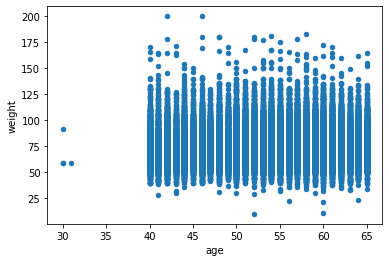

In [15]:
df.plot.scatter(x = 'age', y = 'weight', s = 20);

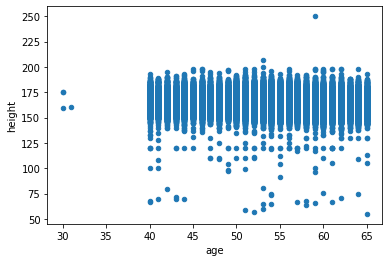

In [16]:
df.plot.scatter(x = 'age', y = 'height', s = 20);

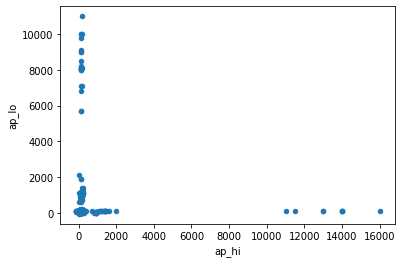

In [17]:
df.plot.scatter(x = 'ap_hi', y = 'ap_lo', s = 20);

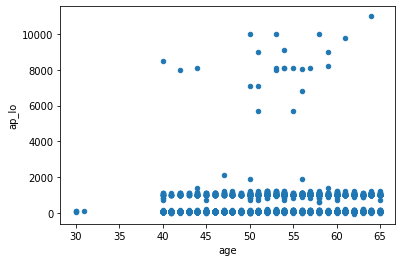

In [18]:
df.plot.scatter(x = 'age', y = 'ap_lo', s = 20);

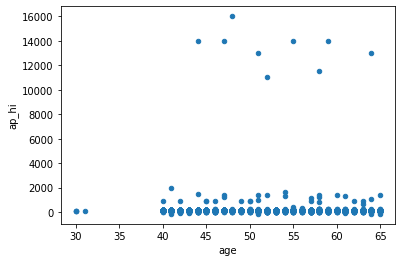

In [19]:
df.plot.scatter(x = 'age', y = 'ap_hi', s = 20);

## Replace columns values with corresponding category


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_text_genre, df.cardio , test_size = 0.1, random_state=42)

In [21]:
print(X_train)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
37194  44.0       2     170    75.0    150     80            1     1      1   
6265   64.0       2     162    73.0    160     90            1     1      0   
54886  65.0       1     169    74.0    120     80            1     1      0   
860    50.0       1     167    70.0    120     80            1     1      0   
15795  42.0       2     177    64.0    120     80            1     1      0   

       alco  active  cardio  
42878     0       1  

gender
1    41041
2    21959
dtype: int64

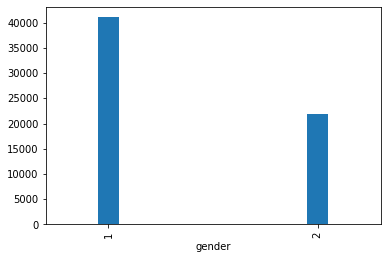

In [22]:
group_age = X_train.groupby(['gender'])['cardio'].count().plot.bar(width= .1)
group_age

gender_groups = X_train.groupby('gender')
gender_groups.first()
gender_groups.size()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco  \
gluc                                                                         
1     44.0       2     173    70.0    120     80            1      0     0   
2     58.0       2     165    90.0    150    100            3      0     0   
3     65.0       1     157    80.0    150    100            3      0     0   

      active  cardio  
gluc                  
1          1       1  
2          1       1  
3          1       0

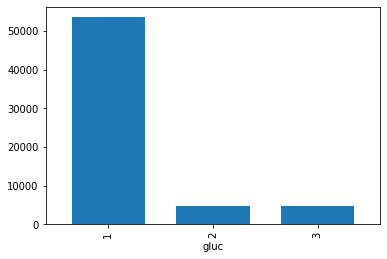

In [23]:
group_gluc = X_train.groupby(['gluc'])['cardio'].count().plot.bar(width= .7)
group_gluc

gluc_groups = X_train.groupby('gluc')
gluc_groups.first()


# bins = X_train.gluc.unique()
# print(bins)

### Advantages of Discetization :
- The probabilistic predictions returned decision tree are monotonically related to the target.
- The new bins show decreased entropy, this is the observations within each bucket/bin are more similar to themselves than to those of other buckets/bins.
- The tree finds the bins automatically.

### Disadvantages of Discretization:

- It may cause over-fitting
- More importantly, some tuning of tree parameters might need to be done to obtain the optimal splits (e.g., depth, the minimum number of samples in one partition, the maximum number of partitions, and a minimum information gain). This it can be time-consuming.

##  Build a classification tree using the `age` to predict cardiovascular disease in order to `discretise the age` variable.  

### Discretization (Preprocessing) is done using of-the-shelf `DecisionTreeClassifier`. However, I build the tree from scratch below   

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.age.to_frame(), X_train.cardio)
X_train['age_tree']=tree_model.predict_proba(X_train.age.to_frame())[:,1] 
X_train.head(10)

<ipython-input-24-6d89740c4da6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age_tree']=tree_model.predict_proba(X_train.age.to_frame())[:,1]


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
7100   65.0       1     157    80.0    150    100            3     3      0   
18943  47.0       1     165   117.0    120     80            1     1      0   
28420  47.0       1     154    64.0    140     90            3     3      0   
42116  65.0       2     180    74.0    120     80            1     1      0   
53313  45.0       1     165    70.0    120     70            1     1      0   

       alco  active  cardio  age_tree  
42878     0       1       1  0.567911  
5946      0       1       1  0.297727  
33058     0       1       0  0.567911  
34692     0       1       1  0.698870  
59232     0       1       1  0.452547  
7100      0       1       0  0.698870  
18943     0       1       0  0.452547  
28420     0       1       1  0.452547  
42116     0       1       0  0.698870  
53313     0       1       0  0.297727

<AxesSubplot:ylabel='age_tree'>

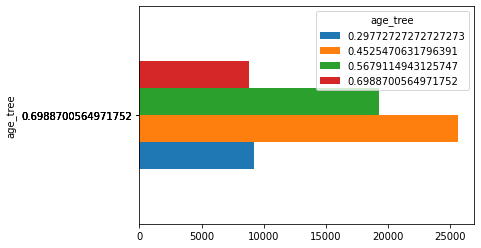

In [25]:
# group_age_tree = X_train.groupby(['age_tree'])['cardio'].count().plot.bar(width= .1)
X_train.groupby('age_tree').age_tree.value_counts().unstack(0).plot.barh()


In [26]:
age_tree_groups = X_train.groupby('age_tree')
age_tree_groups.first()


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
age_tree                                                                  
0.297727  44.0       2     173    70.0    120     80            1     1   
0.452547  46.0       1     164    68.0    110     70            1     1   
0.567911  58.0       2     165    90.0    150    100            3     2   
0.698870  63.0       1     155    52.0    120     80            1     1   

          smoke  alco  active  cardio  
age_tree                               
0.297727      0     0       1       1  
0.452547      0     0       1       1  
0.567911      0     0       1       1  
0.698870      0     0       1       1

In [27]:
age_tree_groups.size()

age_tree
0.297727     9240
0.452547    25657
0.567911    19253
0.698870     8850
dtype: int64

In [28]:
# Checking Age limit buckets generated by the tree
pd.concat( [X_train.groupby(['age_tree'])['age'].min(),
            X_train.groupby(['age_tree'])['age'].max()], axis=1)

age   age
age_tree            
0.297727  30.0  45.0
0.452547  46.0  55.0
0.567911  56.0  61.0
0.698870  62.0  65.0

In [29]:
# Checking the number of unique values present in Age_treevariable
X_train.age_tree.unique()

# A tree of depth 2, makes 2 splits, therefore generating 4 buckets,
# that is why we see 4 different probabilities in the output above.

array([0.56791149, 0.29772727, 0.69887006, 0.45254706])

Text(0, 0.5, 'cardio')

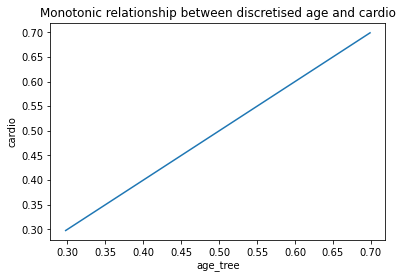

In [30]:
# Check the relationship between the discretized variable age_tree and the target cardio.
fig = plt.figure()
fig = X_train.groupby(['age_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised age and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .


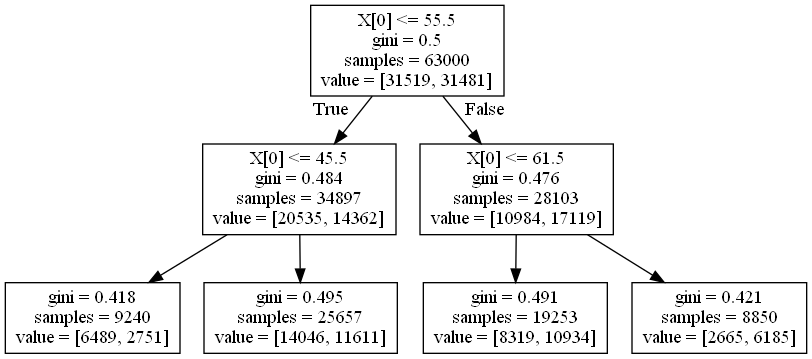

In [31]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

dot_file = "age_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     
    

###  Build a classification tree using the `height` to predict cardiovascular disease in order to `discretise the height` variable.

In [32]:
tree_model1 = DecisionTreeClassifier(max_depth=2)
tree_model1.fit(X_train.height.to_frame(), X_train.cardio)
X_train['height_tree']=tree_model1.predict_proba(X_train.height.to_frame())[:,1] 
X_train.head(10)

<ipython-input-32-ff11e8460298>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['height_tree']=tree_model1.predict_proba(X_train.height.to_frame())[:,1]


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
7100   65.0       1     157    80.0    150    100            3     3      0   
18943  47.0       1     165   117.0    120     80            1     1      0   
28420  47.0       1     154    64.0    140     90            3     3      0   
42116  65.0       2     180    74.0    120     80            1     1      0   
53313  45.0       1     165    70.0    120     70            1     1      0   

       alco  active  cardio  age_tree  height_tree  
42878     0       1       1  0.567911     0.491825  
5946      0       1       1  0.297727     0.504720  
33058     0       1       0  0.567911     0.525440  
34692     0       1       1  0.698870     0.525440  
59232     0       1       1  0.452547     0.491825  
7100      0       1       0  0.698870     0.491825  
18943     0       1       0  0.452547     0.491825  
28420     0       1       1  0.452547     0.525440  
42116     0       1       0  0.698870     0.504720  
53313     0       1       0  0.297727     0.491825

<AxesSubplot:ylabel='height_tree'>

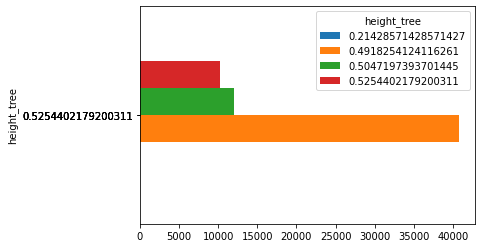

In [33]:
X_train.groupby('height_tree').height_tree.value_counts().unstack(0).plot.barh()

In [34]:
height_tree_groups = X_train.groupby('height_tree')
height_tree_groups.first()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
height_tree                                                                  
0.214286     43.0       2      70    69.0    120     80            1     1   
0.491825     58.0       2     165    90.0    150    100            3     2   
0.504720     44.0       2     173    70.0    120     80            1     1   
0.525440     59.0       1     148    67.0    130     80            1     1   

             smoke  alco  active  cardio  age_tree  
height_tree                                         
0.214286         0     0       0       0  0.297727  
0.491825         0     0       1       1  0.567911  
0.504720         0     0       1       1  0.297727  
0.525440         0     0       1       0  0.567911

In [35]:
height_tree_groups.size()

height_tree
0.214286       14
0.491825    40736
0.504720    11971
0.525440    10279
dtype: int64

In [36]:
pd.concat( [X_train.groupby(['height_tree'])['height'].min(),
            X_train.groupby(['height_tree'])['height'].max()], axis=1)

height  height
height_tree                
0.214286         55      71
0.491825        157     170
0.504720        171     250
0.525440         72     156

In [37]:
X_train.height_tree.unique()

array([0.49182541, 0.50471974, 0.52544022, 0.21428571])

Text(0, 0.5, 'cardio')

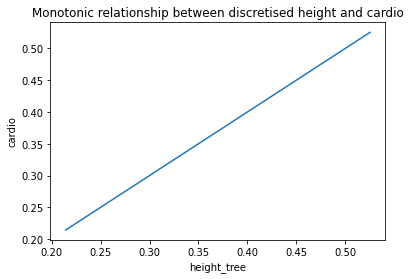

In [38]:
# Check the relationship between the discretized variable age_tree and the target cardio.
# That plot suggests that age_tree seems like a good predictor of the target variable cardio .
fig = plt.figure()
fig = X_train.groupby(['height_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised height and cardio')
fig.set_ylabel('cardio')

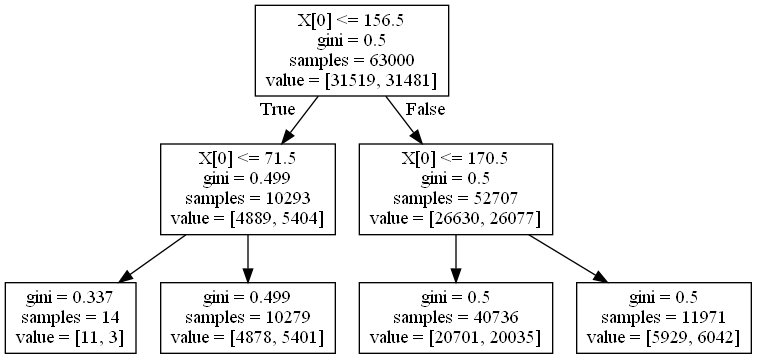

In [39]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "height_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model1, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     


###  Build a classification tree using the `weight` to predict cardiovascular disease in order to `discretise the weight` variable.

In [40]:
tree_model2 = DecisionTreeClassifier(max_depth=2)
tree_model2.fit(X_train.weight.to_frame(), X_train.cardio)
X_train['weight_tree']=tree_model2.predict_proba(X_train.weight.to_frame())[:,1] 
X_train.head(10)

<ipython-input-40-4937511b45da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weight_tree']=tree_model2.predict_proba(X_train.weight.to_frame())[:,1]


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
7100   65.0       1     157    80.0    150    100            3     3      0   
18943  47.0       1     165   117.0    120     80            1     1      0   
28420  47.0       1     154    64.0    140     90            3     3      0   
42116  65.0       2     180    74.0    120     80            1     1      0   
53313  45.0       1     165    70.0    120     70            1     1      0   

       alco  active  cardio  age_tree  height_tree  weight_tree  
42878     0       1       1  0.567911     0.491825     0.564381  
5946      0       1       1  0.297727     0.504720     0.458705  
33058     0       1       0  0.567911     0.525440     0.458705  
34692     0       1       1  0.698870     0.525440     0.351583  
59232     0       1       1  0.452547     0.491825     0.458705  
7100      0       1       0  0.698870     0.491825     0.564381  
18943     0       1       0  0.452547     0.491825     0.663261  
28420     0       1       1  0.452547     0.525440     0.458705  
42116     0       1       0  0.698870     0.504720     0.458705  
53313     0       1       0  0.297727     0.491825     0.458705

<AxesSubplot:ylabel='weight_tree'>

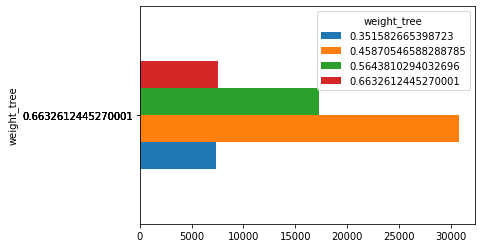

In [41]:
X_train.groupby('weight_tree').weight_tree.value_counts().unstack(0).plot.barh()

In [42]:
weight_tree_groups = X_train.groupby('weight_tree')
weight_tree_groups.first()


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
weight_tree                                                                  
0.351583     63.0       1     155    52.0    120     80            1     1   
0.458705     44.0       2     173    70.0    120     80            1     1   
0.564381     58.0       2     165    90.0    150    100            3     2   
0.663261     47.0       1     165   117.0    120     80            1     1   

             smoke  alco  active  cardio  age_tree  height_tree  
weight_tree                                                      
0.351583         0     0       1       1  0.698870     0.525440  
0.458705         0     0       1       1  0.297727     0.504720  
0.564381         0     0       1       1  0.567911     0.491825  
0.663261         0     0       1       0  0.452547     0.491825

In [43]:
weight_tree_groups.size()

weight_tree
0.351583     7361
0.458705    30791
0.564381    17311
0.663261     7537
dtype: int64

In [44]:
pd.concat( [X_train.groupby(['weight_tree'])['weight'].min(),
            X_train.groupby(['weight_tree'])['weight'].max()], axis=1)

weight  weight
weight_tree                
0.351583       11.0    59.8
0.458705       60.0    75.6
0.564381       76.0    90.5
0.663261       90.7   200.0

In [45]:
X_train.weight_tree.unique()

array([0.56438103, 0.45870547, 0.35158267, 0.66326124])

Text(0, 0.5, 'cardio')

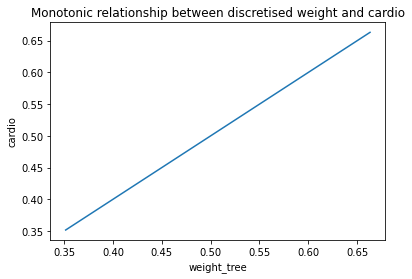

In [46]:
# Check the relationship between the discretized variable weight_tree and the target cardio.
fig = plt.figure()
fig = X_train.groupby(['weight_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised weight and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that weight_tree seems like a good predictor of the target variable cardio .


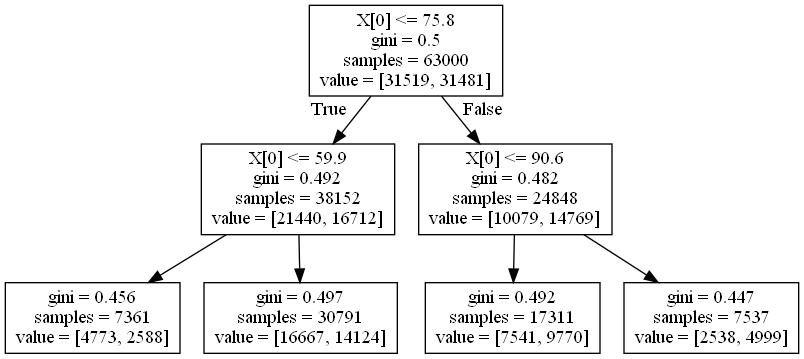

In [47]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "weight_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model2, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     

###  Build a classification tree using the `ap_lo` to predict cardiovascular disease in order to `discretise the ap_lo` variable. dyastolic

In [48]:
tree_model3 = DecisionTreeClassifier(max_depth=2)
tree_model3.fit(X_train.ap_lo.to_frame(), X_train.cardio)
X_train['ap_lo_tree']=tree_model3.predict_proba(X_train.ap_lo.to_frame())[:,1] 
X_train.head(10)

<ipython-input-48-16ce537d618e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ap_lo_tree']=tree_model3.predict_proba(X_train.ap_lo.to_frame())[:,1]


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
7100   65.0       1     157    80.0    150    100            3     3      0   
18943  47.0       1     165   117.0    120     80            1     1      0   
28420  47.0       1     154    64.0    140     90            3     3      0   
42116  65.0       2     180    74.0    120     80            1     1      0   
53313  45.0       1     165    70.0    120     70            1     1      0   

       alco  active  cardio  age_tree  height_tree  weight_tree  ap_lo_tree  
42878     0       1       1  0.567911     0.491825     0.564381    0.838538  
5946      0       1       1  0.297727     0.504720     0.458705    0.425420  
33058     0       1       0  0.567911     0.525440     0.458705    0.425420  
34692     0       1       1  0.698870     0.525440     0.351583    0.425420  
59232     0       1       1  0.452547     0.491825     0.458705    0.277360  
7100      0       1       0  0.698870     0.491825     0.564381    0.838538  
18943     0       1       0  0.452547     0.491825     0.663261    0.425420  
28420     0       1       1  0.452547     0.525440     0.458705    0.747788  
42116     0       1       0  0.698870     0.504720     0.458705    0.425420  
53313     0       1       0  0.297727     0.491825     0.458705    0.277360

<AxesSubplot:ylabel='ap_lo_tree'>

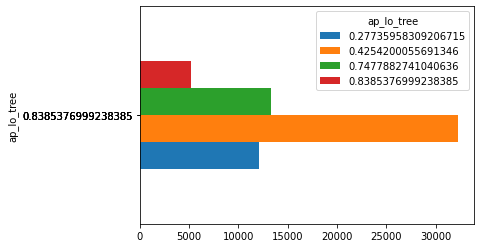

In [49]:
X_train.groupby('ap_lo_tree').ap_lo_tree.value_counts().unstack(0).plot.barh()

In [50]:
ap_lo_tree_groups = X_train.groupby('ap_lo_tree')
ap_lo_tree_groups.first()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
ap_lo_tree                                                                  
0.277360    46.0       1     164    68.0    110     70            1     1   
0.425420    44.0       2     173    70.0    120     80            1     1   
0.747788    47.0       1     154    64.0    140     90            3     3   
0.838538    58.0       2     165    90.0    150    100            3     2   

            smoke  alco  active  cardio  age_tree  height_tree  weight_tree  
ap_lo_tree                                                                   
0.277360        0     0       1       1  0.452547     0.491825     0.458705  
0.425420        0     0       1       1  0.297727     0.504720     0.458705  
0.747788        0     0       1       1  0.452547     0.525440     0.458705  
0.838538        0     0       1       1  0.567911     0.491825     0.564381

In [51]:
ap_lo_tree_groups.size()

ap_lo_tree
0.277360    12089
0.425420    32321
0.747788    13338
0.838538     5252
dtype: int64

In [52]:
pd.concat( [X_train.groupby(['ap_lo_tree'])['ap_lo'].min(),
            X_train.groupby(['ap_lo_tree'])['ap_lo'].max()], axis=1)

ap_lo  ap_lo
ap_lo_tree              
0.277360      -70     73
0.425420       74     85
0.747788       86     98
0.838538       99  11000

In [53]:
X_train.ap_lo_tree.unique()

array([0.8385377 , 0.42542001, 0.27735958, 0.74778827])

Text(0, 0.5, 'cardio')

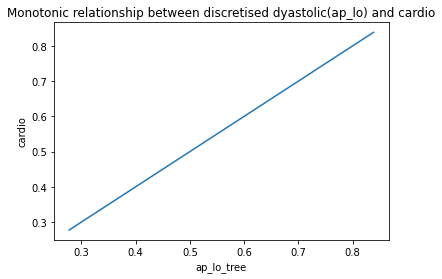

In [54]:
# Check the relationship between the discretized variable age_tree and the target cardio.
fig = plt.figure()
fig = X_train.groupby(['ap_lo_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised dyastolic(ap_lo) and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .

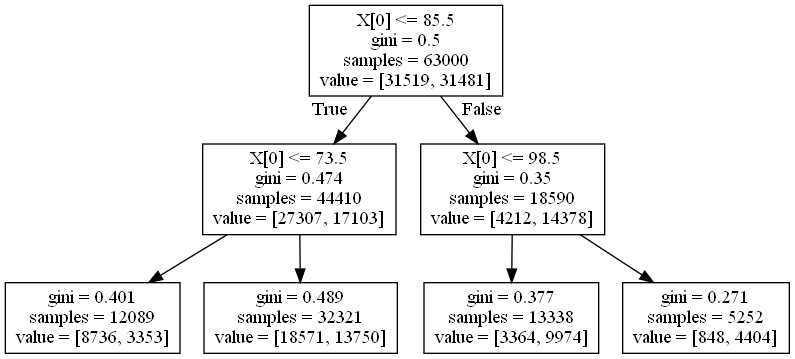

In [55]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "ap_lo_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model3, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     

###  Build a classification tree using the `api_hi` to predict cardiovascular disease in order to `discretise the api_hi` variable. Systolic

### Here I used the ROC_AUC to determine the best depth for the descritization

In [56]:
from sklearn.model_selection import cross_val_score

score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4, 5, 6]:
    tree_model4 = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model4, X_train.ap_hi.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

# depth 3 or 4 will be suffietient for our case..

   depth  roc_auc_mean  roc_auc_std
0      1      0.713104     0.001697
1      2      0.749480     0.002129
2      3      0.752027     0.001922
3      4      0.753379     0.001880
4      5      0.753593     0.002023
5      6      0.753639     0.001876


In [57]:
tree_model4 = DecisionTreeClassifier(max_depth=3)
tree_model4.fit(X_train.ap_hi.to_frame(), X_train.cardio)
X_train['ap_hi_tree']=tree_model4.predict_proba(X_train.ap_hi.to_frame())[:,1] 
X_train.head(10)

<ipython-input-57-9c55b30beeaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ap_hi_tree']=tree_model4.predict_proba(X_train.ap_hi.to_frame())[:,1]


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
42878  58.0       2     165    90.0    150    100            3     2      0   
5946   44.0       2     173    70.0    120     80            1     1      0   
33058  59.0       1     148    67.0    130     80            1     1      0   
34692  63.0       1     155    52.0    120     80            1     1      0   
59232  46.0       1     164    68.0    110     70            1     1      0   
7100   65.0       1     157    80.0    150    100            3     3      0   
18943  47.0       1     165   117.0    120     80            1     1      0   
28420  47.0       1     154    64.0    140     90            3     3      0   
42116  65.0       2     180    74.0    120     80            1     1      0   
53313  45.0       1     165    70.0    120     70            1     1      0   

       alco  active  cardio  age_tree  height_tree  weight_tree  ap_lo_tree  \
42878     0       1       1  0.567911     0.491825     0.564381    0.838538   
5946      0       1       1  0.297727     0.504720     0.458705    0.425420   
33058     0       1       0  0.567911     0.525440     0.458705    0.425420   
34692     0       1       1  0.698870     0.525440     0.351583    0.425420   
59232     0       1       1  0.452547     0.491825     0.458705    0.277360   
7100      0       1       0  0.698870     0.491825     0.564381    0.838538   
18943     0       1       0  0.452547     0.491825     0.663261    0.425420   
28420     0       1       1  0.452547     0.525440     0.458705    0.747788   
42116     0       1       0  0.698870     0.504720     0.458705    0.425420   
53313     0       1       0  0.297727     0.491825     0.458705    0.277360   

       ap_hi_tree  
42878    0.862294  
5946     0.357083  
33058    0.591464  
34692    0.357083  
59232    0.231710  
7100     0.862294  
18943    0.357083  
28420    0.815801  
42116    0.357083  
53313    0.357083

<AxesSubplot:ylabel='ap_hi_tree'>

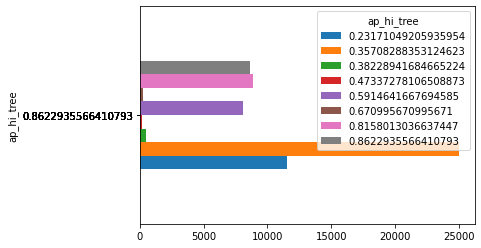

In [58]:
X_train.groupby('ap_hi_tree').ap_hi_tree.value_counts().unstack(0).plot.barh()

In [59]:
ap_hi_tree_groups = X_train.groupby('ap_hi_tree')
ap_hi_tree_groups.first()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
ap_hi_tree                                                                  
0.231710    46.0       1     164    68.0    110     70            1     1   
0.357083    44.0       2     173    70.0    120     80            1     1   
0.382289    56.0       1     167    80.0    127     80            1     1   
0.473373    55.0       1     172    72.0     11     70            1     1   
0.591464    59.0       1     148    67.0    130     80            1     1   
0.670996    46.0       1     156    97.0    135     90            3     3   
0.815801    47.0       1     154    64.0    140     90            3     3   
0.862294    58.0       2     165    90.0    150    100            3     2   

            smoke  alco  active  cardio  age_tree  height_tree  weight_tree  \
ap_hi_tree                                                                    
0.231710        0     0       1       1  0.452547     0.491825     0.458705   
0.357083        0     0       1       1  0.297727     0.504720     0.458705   
0.382289        0     0       0       1  0.567911     0.491825     0.564381   
0.473373        0     0       1       1  0.452547     0.504720     0.458705   
0.591464        0     0       1       0  0.567911     0.525440     0.458705   
0.670996        0     0       1       1  0.452547     0.525440     0.663261   
0.815801        0     0       1       1  0.452547     0.525440     0.458705   
0.862294        0     0       1       1  0.567911     0.491825     0.564381   

            ap_lo_tree  
ap_hi_tree              
0.231710      0.277360  
0.357083      0.425420  
0.382289      0.425420  
0.473373      0.277360  
0.591464      0.425420  
0.670996      0.747788  
0.815801      0.747788  
0.862294      0.838538

In [60]:
ap_hi_tree_groups.size()

ap_hi_tree
0.231710    11523
0.357083    25011
0.382289      463
0.473373      169
0.591464     8107
0.670996      231
0.815801     8898
0.862294     8598
dtype: int64

In [61]:
pd.concat( [X_train.groupby(['ap_hi_tree'])['ap_hi'].min(),
            X_train.groupby(['ap_hi_tree'])['ap_hi'].max()], axis=1)

ap_hi  ap_hi
ap_hi_tree              
0.231710       60    117
0.357083      118    124
0.382289      125    129
0.473373     -150     24
0.591464      130    134
0.670996      135    138
0.815801      139    149
0.862294      150  14020

In [62]:
X_train.ap_hi_tree.unique()

array([0.86229356, 0.35708288, 0.59146417, 0.23171049, 0.8158013 ,
       0.38228942, 0.47337278, 0.67099567])

Text(0, 0.5, 'cardio')

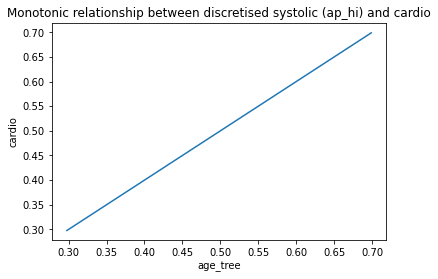

In [63]:

# Check the relationship between the discretized variable ap_hi_tree and the target cardio.
fig = plt.figure()
fig = X_train.groupby(['age_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised systolic (ap_hi) and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .

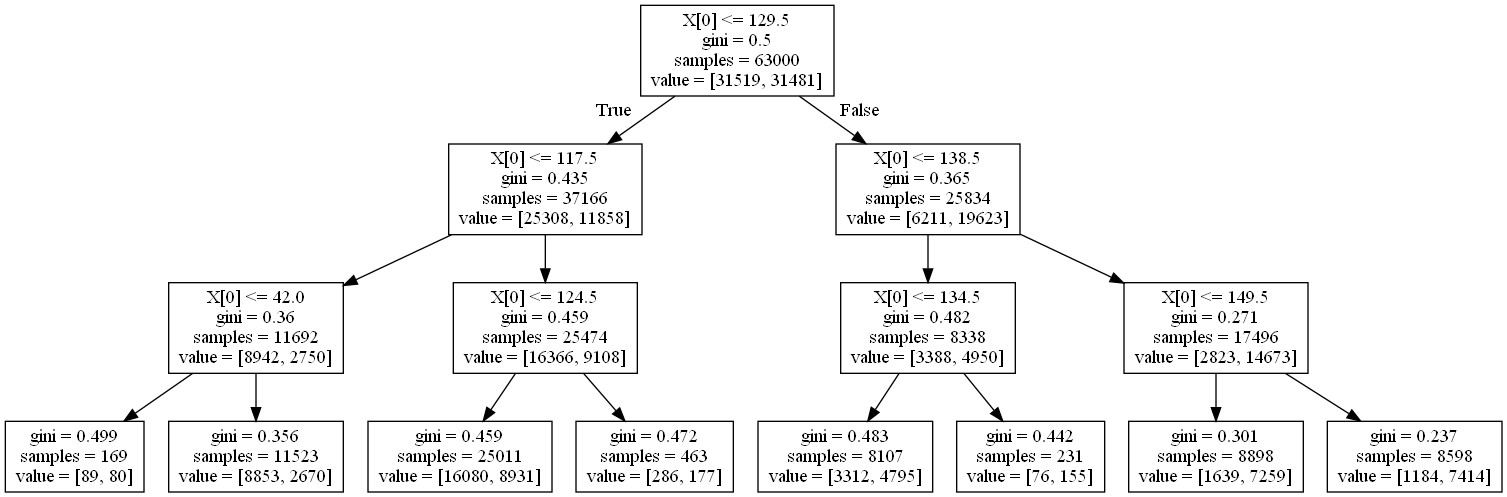

In [64]:

# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "ap_hi_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model4, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     


In [65]:
X_train.gender.replace({1: "female", 2: "male"}, inplace=True)
X_train.cholesterol.replace({1: "normal", 2: "above normal", 3: "well above normal"}, inplace=True)
X_train.gluc.replace({1: "normal", 2: "above normal", 3: "well above normal"}, inplace=True)
X_train.smoke.replace({0: "doesn't smoke", 1: "smokes"}, inplace=True)
X_train.alco.replace({0: "doesn't drink", 1: "drinks"}, inplace=True)
X_train.active.replace({0: "not active", 1: "active"}, inplace=True)
X_train.cardio.replace({0: "absence", 1: "presence"}, inplace=True)
X_train.head(5)


C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
42878  58.0    male     165    90.0    150    100  well above normal   
5946   44.0    male     173    70.0    120     80             normal   
33058  59.0  female     148    67.0    130     80             normal   
34692  63.0  female     155    52.0    120     80             normal   
59232  46.0  female     164    68.0    110     70             normal   

               gluc          smoke           alco  active    cardio  age_tree  \
42878  above normal  doesn't smoke  doesn't drink  active  presence  0.567911   
5946         normal  doesn't smoke  doesn't drink  active  presence  0.297727   
33058        normal  doesn't smoke  doesn't drink  active   absence  0.567911   
34692        normal  doesn't smoke  doesn't drink  active  presence  0.698870   
59232        normal  doesn't smoke  doesn't drink  active  presence  0.452547   

       height_tree  weight_tree  ap_lo_tree  ap_hi_tree  
42878     0.491825     0.564381    0.838538    0.862294  
5946      0.504720     0.458705    0.425420    0.357083  
33058     0.525440     0.458705    0.425420    0.591464  
34692     0.525440     0.351583    0.425420    0.357083  
59232     0.491825     0.458705    0.277360    0.231710

In [66]:
X_train.drop('age', inplace=True, axis=1)
X_train.drop('height', inplace=True, axis=1)
X_train.drop('weight', inplace=True, axis=1)
X_train.drop('ap_hi', inplace=True, axis=1)
X_train.drop('ap_lo', inplace=True, axis=1)


C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
X_train.head()

gender        cholesterol          gluc          smoke           alco  \
42878    male  well above normal  above normal  doesn't smoke  doesn't drink   
5946     male             normal        normal  doesn't smoke  doesn't drink   
33058  female             normal        normal  doesn't smoke  doesn't drink   
34692  female             normal        normal  doesn't smoke  doesn't drink   
59232  female             normal        normal  doesn't smoke  doesn't drink   

       active    cardio  age_tree  height_tree  weight_tree  ap_lo_tree  \
42878  active  presence  0.567911     0.491825     0.564381    0.838538   
5946   active  presence  0.297727     0.504720     0.458705    0.425420   
33058  active   absence  0.567911     0.525440     0.458705    0.425420   
34692  active  presence  0.698870     0.525440     0.351583    0.425420   
59232  active  presence  0.452547     0.491825     0.458705    0.277360   

       ap_hi_tree  
42878    0.862294  
5946     0.357083  
33058    0.591464  
34692    0.357083  
59232    0.231710

In [68]:
# move column in pandas dataframe

X_train= X_train[[c for c in X_train if c not in ['cardio']] + ['cardio']]
X_train.head()

gender        cholesterol          gluc          smoke           alco  \
42878    male  well above normal  above normal  doesn't smoke  doesn't drink   
5946     male             normal        normal  doesn't smoke  doesn't drink   
33058  female             normal        normal  doesn't smoke  doesn't drink   
34692  female             normal        normal  doesn't smoke  doesn't drink   
59232  female             normal        normal  doesn't smoke  doesn't drink   

       active  age_tree  height_tree  weight_tree  ap_lo_tree  ap_hi_tree  \
42878  active  0.567911     0.491825     0.564381    0.838538    0.862294   
5946   active  0.297727     0.504720     0.458705    0.425420    0.357083   
33058  active  0.567911     0.525440     0.458705    0.425420    0.591464   
34692  active  0.698870     0.525440     0.351583    0.425420    0.357083   
59232  active  0.452547     0.491825     0.458705    0.277360    0.231710   

         cardio  
42878  presence  
5946   presence  
33058   absence  
34692  presence  
59232  presence

In [69]:
# Column labels.
# These are used only to print the tree.
header = list(X_train)
header

['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_tree',
 'height_tree',
 'weight_tree',
 'ap_lo_tree',
 'ap_hi_tree',
 'cardio']

# Building Decision Tree from Scratch

In [70]:
# Format: each row is an example.
# The last column is the label.
# The first columns are features.
training_data = X_train.values.tolist()

In [71]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [72]:
for i in range (len(header)):
    print(f'unique values of {header[i]} = {len(unique_vals(training_data, i))}')

unique values of gender = 2
unique values of cholesterol = 3
unique values of gluc = 3
unique values of smoke = 2
unique values of alco = 2
unique values of active = 2
unique values of age_tree = 4
unique values of height_tree = 4
unique values of weight_tree = 4
unique values of ap_lo_tree = 4
unique values of ap_hi_tree = 8
unique values of cardio = 2


In [73]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [74]:
#######
# Demo:
class_counts(training_data)
#######

{'presence': 31481, 'absence': 31519}

In [75]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [76]:
#######
# Demo:
is_numeric(7)
# is_numeric("Red")
#######

True

In [77]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 53 for age) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [78]:
#######
# Demo:
# Let's write a question for a numeric attribute
Question(1, 2)

Is cholesterol >= 2?

In [79]:
# How about one for a categorical attribute
q = Question(0, 'female')
q

Is gender == female?

In [80]:
# Let's pick an example from the training set ...
example = training_data[0]
# ... and see if it matches the question
q.match(example) # this will be false, since the first example is male .
#######

False

In [81]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [82]:
#######
# Demo:
# Let's partition the training data based on whether rows are females.
true_rows, false_rows = partition(training_data, Question(0, 'female'))
# This will contain all the 'female' rows.
true_rows[:2]

[['female',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.5679114943125747,
  0.5254402179200311,
  0.45870546588288785,
  0.4254200055691346,
  0.5914641667694585,
  'absence'],
 ['female',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.6988700564971752,
  0.5254402179200311,
  0.351582665398723,
  0.4254200055691346,
  0.35708288353124623,
  'presence']]

In [83]:
# This will contain everything else.
false_rows[:2]
#######

[['male',
  'well above normal',
  'above normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.5679114943125747,
  0.4918254124116261,
  0.5643810294032696,
  0.8385376999238385,
  0.8622935566410793,
  'presence'],
 ['male',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.29772727272727273,
  0.5047197393701445,
  0.45870546588288785,
  0.4254200055691346,
  0.35708288353124623,
  'presence']]

# Criterion: Gini V.S. Entropy

The Gini Index and the Entropy have two main differences:

- Gini Index has values inside the interval [0, 0.5] whereas the interval of the Entropy is [0, 1]. In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.

- Computationally, entropy is more complex since it makes use of logarithms and consequently, the calculation of the Gini Index will be faster.

> `Gini Impurity is better as compared to entropy for selecting the best features.`

In [84]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    
    the optimum split is chosen by the features with less Gini Index.
    
    The gini impurity measures the frequency at which any 
    element of the dataset will be mislabelled when it is randomly labeled.
    """
    
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [85]:
def entropy(rows):
    """
    Calculate the Entropy for a list of rows.
    
    the optimum split is chosen by the feature with less entropy. 
    
    Entropy is a measure of information that indicates the disorder of the features with the target.
    """
    
    counts = class_counts(rows)
    entropy = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        entropy -= (prob_of_lbl * np.log2(prob_of_lbl))
    return entropy
    
    

In [86]:
#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
              ['Apple']]
# this will return 0
print("Gini:", gini(no_mixing))
print("Entropy:", entropy(no_mixing))


Gini: 0.0
Entropy: 0.0


In [88]:
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
some_mixing = [['Apple'],
               ['Orange']]
# Gini   :: will return 0.5 - meaning, there's a 50% chance of misclassifying a random example we draw from the dataset.
# Entropy:: will return 1.0 - meaning the probability of the two classes is the same.

print("Gini:", gini(some_mixing))
print("Entropy:", entropy(some_mixing))

Gini: 0.5
Entropy: 1.0


In [91]:
#######
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
current_uncertainty_gini = gini(training_data)
current_uncertainty_entropy = entropy(training_data)

print("Gini:", current_uncertainty_gini)
print("Entropy:",current_uncertainty_entropy)

Gini: 0.4999998180901991
Entropy: 0.9999997375596164


In [93]:
def info_gain(left, right, current_uncertainty, criterion):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    if criterion == "gini":
        return current_uncertainty - p * gini(left) - (1 - p) * gini(right)
    elif criterion == "entropy":
        return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)
    else: print("Error using criterion - use 'gini' or 'entropy' only")
        

In [94]:
# How much information do we gain by partioning on  gender 'male'?
true_rows, false_rows = partition(training_data, Question(0, 'male'))
info_gain(true_rows, false_rows, current_uncertainty,"gini")

4.3572813324121995e-05

In [96]:
# How much information do we gain by partioning on  gluc 'normal'?
true_rows, false_rows = partition(training_data, Question(2, 'normal'))
info_gain(true_rows, false_rows, current_uncertainty, "gini")

0.00422005605564979

In [95]:
# How much information do we gain by partioning on  gender 'male'?
true_rows, false_rows = partition(training_data, Question(0, 'male'))
info_gain(true_rows, false_rows, current_uncertainty,"entropy")

-0.49993705603285793

In [97]:
# How much information do we gain by partioning on  gluc 'normal'?
true_rows, false_rows = partition(training_data, Question(2, 'normal'))
info_gain(true_rows, false_rows, current_uncertainty, "entropy")

-0.4938700338968438

### It looks like we learned more using gluc 'normal' (0.004), than gender'male' (4.35e-5).  which seem consiestent with the graphs below 
- gluc 'normal' :: unmix the data well hence greater information gain.
- gender 'male' :: no much unmix of the data hence less information gain.

<AxesSubplot:xlabel='gluc'>

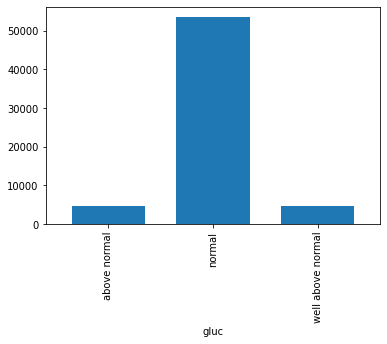

In [98]:
X_train.groupby(['gluc'])['cardio'].count().plot.bar(width= .7)

<AxesSubplot:xlabel='gender'>

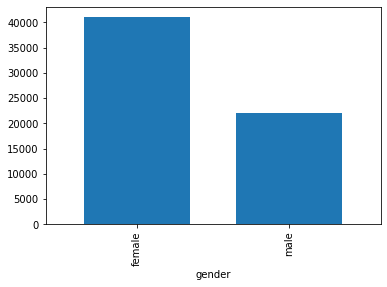

In [99]:
X_train.groupby(['gender'])['cardio'].count().plot.bar(width= .7)

In [100]:
def find_best_split(rows, criterion):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    # =============================================
    if criterion == "gini":
        current_uncertainty = gini(rows)
    elif criterion == "entropy":
        current_uncertainty = entropy(rows)
    else: 
        print("Error using criterion - use 'gini' or 'entropy' only")
    # =============================================
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty, criterion)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [101]:
#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data, "gini")
best_question
#######

Is ap_hi_tree >= 0.5914641667694585?

In [102]:
#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data, "entropy")
best_question
#######

Is ap_hi_tree >= 0.5914641667694585?

In [103]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [104]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [109]:
def build_tree(rows, criterion):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows, criterion)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows, criterion)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows, criterion)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [110]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [111]:
my_tree = build_tree(training_data, "gini")
# start 3:18  end 3:19

In [112]:
my_tree_entropy = build_tree(training_data, "entropy")

In [113]:
print_tree(my_tree)

Is ap_hi_tree >= 0.5914641667694585?
--> True:
  Is ap_hi_tree >= 0.8158013036637447?
  --> True:
    Is ap_hi_tree >= 0.8622935566410793?
    --> True:
      Is ap_lo_tree >= 0.4254200055691346?
      --> True:
        Is gluc == well above normal?
        --> True:
          Is smoke == doesn't smoke?
          --> True:
            Is gender == male?
            --> True:
              Is weight_tree >= 0.6632612445270001?
              --> True:
                Is active == not active?
                --> True:
                  Predict {'presence': 6}
                --> False:
                  Is ap_lo_tree >= 0.8385376999238385?
                  --> True:
                    Is alco == doesn't drink?
                    --> True:
                      Is age_tree >= 0.6988700564971752?
                      --> True:
                        Is height_tree >= 0.5047197393701445?
                        --> True:
                          Is cholesterol == well above normal?
   

                                    Predict {'presence': 5, 'absence': 2}
                              --> False:
                                Is weight_tree >= 0.6632612445270001?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                        --> False:
                          Predict {'presence': 5}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Is age_tree >= 0.5679114943125747?
                        --> True:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Predict {'presence': 1}
                          --> False:
                            Is weight_tree >= 0.6632612445270001?
                            --> True:
                     

                                      Predict {'absence': 5, 'presence': 20}
                                    --> False:
                                      Predict {'presence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                              --> False:
                                Is weight_tree >= 0.6632612445270001?
                                --> True:
                                  Predict {'presence': 4}
                                --> False:
                                  Predict {'presence': 8, 'absence': 2}
                          --> False:
                            Is gluc == above normal?
                            --> True:
                              Is active == active?
                              --> True:
                                Is weight_tree >= 0.6632612445270001?
                                --> True:
                                  Is age_tree >= 0.45

                                        Predict {'presence': 4, 'absence': 1}
                                      --> False:
                                        Predict {'presence': 5}
                                  --> False:
                                    Is active == not active?
                                    --> True:
                                      Predict {'presence': 1, 'absence': 1}
                                    --> False:
                                      Predict {'presence': 15, 'absence': 3}
                                --> False:
                                  Is weight_tree >= 0.6632612445270001?
                                  --> True:
                                    Is active == not active?
                                    --> True:
                                      Predict {'absence': 1}
                                    --> False:
                                      Predict {'presence': 5}
                     

                  --> True:
                    Is age_tree >= 0.6988700564971752?
                    --> True:
                      Is active == not active?
                      --> True:
                        Is gluc == above normal?
                        --> True:
                          Is weight_tree >= 0.6632612445270001?
                          --> True:
                            Predict {'presence': 2}
                          --> False:
                            Is cholesterol == well above normal?
                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Is weight_tree >= 0.5643810294032696?
                              --> True:
                                Is height_tree >= 0.5047197393701445?
                                --> True:
                                  Predict {'absence': 1, 'presence': 1}
                                --> False:
      

                                          Predict {'presence': 8, 'absence': 1}
                                        --> False:
                                          Predict {'presence': 13, 'absence': 1}
                                    --> False:
                                      Is weight_tree >= 0.5643810294032696?
                                      --> True:
                                        Is age_tree >= 0.6988700564971752?
                                        --> True:
                                          Predict {'presence': 7, 'absence': 1}
                                        --> False:
                                          Predict {'presence': 12, 'absence': 3}
                                      --> False:
                                        Is age_tree >= 0.6988700564971752?
                                        --> True:
                                          Predict {'presence': 11, 'absence': 1}
                         

                                  Is weight_tree >= 0.6632612445270001?
                                  --> True:
                                    Predict {'presence': 7}
                                  --> False:
                                    Is weight_tree >= 0.5643810294032696?
                                    --> True:
                                      Is alco == doesn't drink?
                                      --> True:
                                        Is gluc == above normal?
                                        --> True:
                                          Predict {'presence': 1}
                                        --> False:
                                          Predict {'presence': 7, 'absence': 1}
                                      --> False:
                                        Predict {'presence': 1}
                                    --> False:
                                      Predict {'presence': 1}
             

                                Predict {'absence': 1}
                --> False:
                  Is age_tree >= 0.4525470631796391?
                  --> True:
                    Is cholesterol == normal?
                    --> True:
                      Is ap_lo_tree >= 0.8385376999238385?
                      --> True:
                        Is weight_tree >= 0.6632612445270001?
                        --> True:
                          Is gender == male?
                          --> True:
                            Predict {'presence': 19}
                          --> False:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Predict {'absence': 1, 'presence': 2}
                            --> False:
                              Is gluc == above normal?
                              --> True:
                                Predict {'presence': 3}
                              --> False:


                                  --> True:
                                    Predict {'presence': 7, 'absence': 1}
                                  --> False:
                                    Predict {'presence': 13, 'absence': 2}
                                --> False:
                                  Is age_tree >= 0.6988700564971752?
                                  --> True:
                                    Predict {'presence': 4, 'absence': 1}
                                  --> False:
                                    Predict {'presence': 2, 'absence': 1}
                              --> False:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
                                  Predict {'presence': 19, 'absence': 2}
                                --> False:
                                  Predict {'presence': 8, 'absence': 1}
                            --> False:
                              Pred

                                    Predict {'presence': 14, 'absence': 2}
                                  --> False:
                                    Is weight_tree >= 0.45870546588288785?
                                    --> True:
                                      Predict {'absence': 4, 'presence': 10}
                                    --> False:
                                      Predict {'absence': 1, 'presence': 1}
                                --> False:
                                  Is weight_tree >= 0.45870546588288785?
                                  --> True:
                                    Is weight_tree >= 0.5643810294032696?
                                    --> True:
                                      Predict {'absence': 6, 'presence': 26}
                                    --> False:
                                      Predict {'presence': 25, 'absence': 5}
                                  --> False:
                                 

                                    --> False:
                                      Predict {'presence': 17, 'absence': 5}
                                --> False:
                                  Is gender == male?
                                  --> True:
                                    Is age_tree >= 0.6988700564971752?
                                    --> True:
                                      Predict {'presence': 7, 'absence': 2}
                                    --> False:
                                      Predict {'presence': 13, 'absence': 1}
                                  --> False:
                                    Is age_tree >= 0.6988700564971752?
                                    --> True:
                                      Predict {'presence': 8, 'absence': 1}
                                    --> False:
                                      Predict {'absence': 11, 'presence': 28}
                        --> False:
                     

                        --> True:
                          Is ap_lo_tree >= 0.8385376999238385?
                          --> True:
                            Is weight_tree >= 0.5643810294032696?
                            --> True:
                              Is gluc == above normal?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Is gender == male?
                                --> True:
                                  Predict {'presence': 6, 'absence': 5}
                                --> False:
                                  Predict {'presence': 17, 'absence': 3}
                            --> False:
                              Is gender == male?
                              --> True:
                                Predict {'presence': 9}
                              --> False:
                                Is gluc == above normal?
         

                            Is weight_tree >= 0.6632612445270001?
                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Is smoke == doesn't smoke?
                              --> True:
                                Predict {'absence': 1, 'presence': 1}
                              --> False:
                                Predict {'absence': 1}
                        --> False:
                          Predict {'absence': 2}
                      --> False:
                        Predict {'presence': 1}
                    --> False:
                      Predict {'presence': 13}
                --> False:
                  Is height_tree >= 0.5047197393701445?
                  --> True:
                    Predict {'presence': 2}
                  --> False:
                    Is weight_tree >= 0.6632612445270001?
                    --> True:
                      Pred

                                    Predict {'presence': 9, 'absence': 4}
                                  --> False:
                                    Predict {'presence': 2, 'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                              --> False:
                                Is weight_tree >= 0.45870546588288785?
                                --> True:
                                  Predict {'presence': 65, 'absence': 20}
                                --> False:
                                  Predict {'presence': 12, 'absence': 2}
                            --> False:
                              Is weight_tree >= 0.45870546588288785?
                              --> True:
                                Is alco == doesn't drink?
                                --> True:
                                  Is active == not active?
                                  --> True:
           

                              Predict {'presence': 2, 'absence': 1}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Predict {'presence': 24}
                      --> False:
                        Is weight_tree >= 0.45870546588288785?
                        --> True:
                          Is active == not active?
                          --> True:
                            Predict {'presence': 3}
                          --> False:
                            Is cholesterol == well above normal?
                            --> True:
                              Predict {'presence': 8, 'absence': 2}
                            --> False:
                              Is ap_lo_tree >= 0.4254200055691346?
                              --> True:
                                Predict {'presence': 7, 'absence': 1}
                              --> False:
                          

                  --> False:
                    Is weight_tree >= 0.5643810294032696?
                    --> True:
                      Is active == active?
                      --> True:
                        Is age_tree >= 0.4525470631796391?
                        --> True:
                          Is cholesterol == well above normal?
                          --> True:
                            Predict {'presence': 14}
                          --> False:
                            Is ap_lo_tree >= 0.8385376999238385?
                            --> True:
                              Predict {'presence': 3}
                            --> False:
                              Is weight_tree >= 0.6632612445270001?
                              --> True:
                                Predict {'presence': 3}
                              --> False:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
              

                                --> True:
                                  Is ap_lo_tree >= 0.4254200055691346?
                                  --> True:
                                    Is weight_tree >= 0.45870546588288785?
                                    --> True:
                                      Is ap_lo_tree >= 0.7477882741040636?
                                      --> True:
                                        Predict {'presence': 30, 'absence': 4}
                                      --> False:
                                        Predict {'presence': 13, 'absence': 2}
                                    --> False:
                                      Is ap_lo_tree >= 0.7477882741040636?
                                      --> True:
                                        Predict {'presence': 4, 'absence': 1}
                                      --> False:
                                        Predict {'presence': 1}
                               

                          --> True:
                            Is gender == male?
                            --> True:
                              Is height_tree >= 0.5047197393701445?
                              --> True:
                                Is alco == doesn't drink?
                                --> True:
                                  Is weight_tree >= 0.5643810294032696?
                                  --> True:
                                    Predict {'absence': 1, 'presence': 3}
                                  --> False:
                                    Predict {'presence': 1}
                                --> False:
                                  Predict {'presence': 6}
                              --> False:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Is age_tree >= 0.4525470631796391?
                                  --> True:
         

                        --> True:
                          Predict {'presence': 3}
                        --> False:
                          Is ap_hi_tree >= 0.670995670995671?
                          --> True:
                            Predict {'presence': 2}
                          --> False:
                            Is weight_tree >= 0.6632612445270001?
                            --> True:
                              Predict {'absence': 2, 'presence': 1}
                            --> False:
                              Is alco == doesn't drink?
                              --> True:
                                Is age_tree >= 0.4525470631796391?
                                --> True:
                                  Is gender == male?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Predict {'presence': 9, 'absence': 4}
  

                              Predict {'absence': 1, 'presence': 8}
                      --> False:
                        Predict {'presence': 3}
                    --> False:
                      Is age_tree >= 0.6988700564971752?
                      --> True:
                        Is active == not active?
                        --> True:
                          Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 2, 'presence': 5}
                      --> False:
                        Is age_tree >= 0.5679114943125747?
                        --> True:
                          Is active == not active?
                          --> True:
                            Predict {'absence': 1}
                          --> False:
                            Is alco == doesn't drink?
                            --> True:
                              Predict {'presence': 3, 'absence': 5}
                            --> False:

                          Predict {'presence': 1, 'absence': 1}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Predict {'presence': 1}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Predict {'presence': 2}
                      --> False:
                        Predict {'absence': 1, 'presence': 2}
                  --> False:
                    Is weight_tree >= 0.6632612445270001?
                    --> True:
                      Predict {'absence': 2}
                    --> False:
                      Is age_tree >= 0.5679114943125747?
                      --> True:
                        Predict {'absence': 1}
                      --> False:
                        Predict {'presence': 2}
            --> False:
              Is height_tree >= 0.5254402179200311?
              --> Tr

                          --> False:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Is ap_lo_tree >= 0.7477882741040636?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Predict {'presence': 2}
                            --> False:
                              Is ap_hi_tree >= 0.670995670995671?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
                                  Is weight_tree >= 0.6632612445270001?
                                  --> True:
                                    Predict {'presence': 2}
                                  --> False:
                           

                                --> True:
                                  Predict {'presence': 2}
                                --> False:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Predict {'presence': 1, 'absence': 2}
                                  --> False:
                                    Predict {'presence': 8, 'absence': 6}
                            --> False:
                              Is weight_tree >= 0.6632612445270001?
                              --> True:
                                Is ap_hi_tree >= 0.670995670995671?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Is height_tree >= 0.5047197393701445?
             

                            --> False:
                              Is gluc == above normal?
                              --> True:
                                Is height_tree >= 0.5254402179200311?
                                --> True:
                                  Is weight_tree >= 0.5643810294032696?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                                --> False:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Is weight_tree >= 0.5643810294032696?
                                    --> True:
                                      Predict {'absence': 3, 'presence': 4}
              

                              Predict {'absence': 1}
                            --> False:
                              Predict {'presence': 1}
                          --> False:
                            Predict {'absence': 2}
                    --> False:
                      Predict {'presence': 1}
                  --> False:
                    Is ap_hi_tree >= 0.670995670995671?
                    --> True:
                      Predict {'absence': 3}
                    --> False:
                      Is height_tree >= 0.5047197393701445?
                      --> True:
                        Is gluc == well above normal?
                        --> True:
                          Predict {'presence': 1}
                        --> False:
                          Is ap_lo_tree >= 0.8385376999238385?
                          --> True:
                            Is age_tree >= 0.5679114943125747?
                            --> True:
                              Pre

                              Predict {'absence': 1}
                        --> False:
                          Is cholesterol == above normal?
                          --> True:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Predict {'absence': 2, 'presence': 4}
                            --> False:
                              Predict {'presence': 1}
                          --> False:
                            Is active == not active?
                            --> True:
                              Predict {'absence': 1, 'presence': 2}
                            --> False:
                              Predict {'absence': 3, 'presence': 1}
                      --> False:
                        Is active == active?
                        --> True:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Is choleste

                                    Predict {'presence': 4}
                                  --> False:
                                    Predict {'presence': 5, 'absence': 1}
                            --> False:
                              Is ap_hi_tree >= 0.670995670995671?
                              --> True:
                                Predict {'absence': 2}
                              --> False:
                                Is gender == female?
                                --> True:
                                  Is weight_tree >= 0.5643810294032696?
                                  --> True:
                                    Is weight_tree >= 0.6632612445270001?
                                    --> True:
                                      Predict {'absence': 3, 'presence': 3}
                                    --> False:
                                      Predict {'absence': 13, 'presence': 9}
                                  --> False:
    

                                    Predict {'presence': 1}
                        --> False:
                          Predict {'presence': 6}
                    --> False:
                      Predict {'absence': 2}
                --> False:
                  Is active == active?
                  --> True:
                    Is gluc == normal?
                    --> True:
                      Is ap_hi_tree >= 0.670995670995671?
                      --> True:
                        Predict {'absence': 2}
                      --> False:
                        Is height_tree >= 0.5047197393701445?
                        --> True:
                          Is cholesterol == above normal?
                          --> True:
                            Is age_tree >= 0.4525470631796391?
                            --> True:
                              Predict {'absence': 6}
                            --> False:
                              Predict {'presence': 1}
         

                                  Predict {'absence': 1}
                              --> False:
                                Predict {'presence': 1}
                          --> False:
                            Is weight_tree >= 0.5643810294032696?
                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Predict {'presence': 2}
                  --> False:
                    Predict {'absence': 7}
                --> False:
                  Predict {'presence': 2}
--> False:
  Is age_tree >= 0.5679114943125747?
  --> True:
    Is cholesterol == well above normal?
    --> True:
      Is age_tree >= 0.6988700564971752?
      --> True:
        Is ap_hi_tree >= 0.35708288353124623?
        --> True:
          Is height_tree >= 0.4918254124116261?
          --> True:
            Is ap_lo_tree >= 0.7477882741040636?
            --> True:
              Is gluc == well above normal?

                          Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 3}
                      --> False:
                        Is ap_lo_tree >= 0.4254200055691346?
                        --> True:
                          Is weight_tree >= 0.6632612445270001?
                          --> True:
                            Predict {'presence': 1}
                          --> False:
                            Predict {'absence': 2, 'presence': 2}
                        --> False:
                          Predict {'presence': 3}
                    --> False:
                      Is ap_lo_tree >= 0.7477882741040636?
                      --> True:
                        Predict {'presence': 2}
                      --> False:
                        Is ap_hi_tree >= 0.35708288353124623?
                        --> True:
                          Is weight_tree >= 0.6632612445270001?
                          --> True:

                  Is height_tree >= 0.5047197393701445?
                  --> True:
                    Predict {'absence': 1}
                  --> False:
                    Is active == not active?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is ap_hi_tree >= 0.35708288353124623?
                      --> True:
                        Is alco == doesn't drink?
                        --> True:
                          Is ap_lo_tree >= 0.4254200055691346?
                          --> True:
                            Is smoke == doesn't smoke?
                            --> True:
                              Predict {'presence': 4, 'absence': 2}
                            --> False:
                              Predict {'presence': 1, 'absence': 1}
                          --> False:
                            Predict {'presence': 1}
                        --> False:
                          

                                --> True:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Predict {'absence': 2}
                                  --> False:
                                    Predict {'presence': 1, 'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                              --> False:
                                Predict {'absence': 1}
                            --> False:
                              Predict {'absence': 2}
                          --> False:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Is weight_tree >= 0.5643810294032696?
                              --> True:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
                      

                                      Predict {'presence': 4, 'absence': 2}
                                  --> False:
                                    Predict {'absence': 6, 'presence': 2}
                                --> False:
                                  Is ap_lo_tree >= 0.7477882741040636?
                                  --> True:
                                    Predict {'absence': 2, 'presence': 3}
                                  --> False:
                                    Is ap_lo_tree >= 0.4254200055691346?
                                    --> True:
                                      Predict {'presence': 11, 'absence': 14}
                                    --> False:
                                      Predict {'presence': 41, 'absence': 40}
                          --> False:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Predict {'presence': 2}
           

                    Predict {'absence': 3}
              --> False:
                Is ap_lo_tree >= 0.4254200055691346?
                --> True:
                  Is weight_tree >= 0.45870546588288785?
                  --> True:
                    Is cholesterol == above normal?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Is height_tree >= 0.5047197393701445?
                        --> True:
                          Predict {'presence': 1}
                        --> False:
                          Predict {'presence': 4, 'absence': 1}
                      --> False:
                        Predict {'presence': 3}
                  --> False:
                    Predict {'absence': 1}
                --> False:
                  Predict {'absence': 1}
            --> False:
              Is cholesterol 

                Predict {'presence': 1}
              --> False:
                Is height_tree >= 0.5047197393701445?
                --> True:
                  Is cholesterol == normal?
                  --> True:
                    Is ap_lo_tree >= 0.4254200055691346?
                    --> True:
                      Predict {'absence': 3}
                    --> False:
                      Is height_tree >= 0.5254402179200311?
                      --> True:
                        Is alco == doesn't drink?
                        --> True:
                          Predict {'absence': 4, 'presence': 1}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Predict {'absence': 1}
                  --> False:
                    Is height_tree >= 0.5254402179200311?
                    --> True:
                      Predict {'presence': 1, 'absence': 1}
                    --> False:
        

                                        Is smoke == doesn't smoke?
                                        --> True:
                                          Predict {'presence': 40, 'absence': 39}
                                        --> False:
                                          Predict {'absence': 1, 'presence': 1}
                                      --> False:
                                        Is smoke == doesn't smoke?
                                        --> True:
                                          Predict {'presence': 6, 'absence': 8}
                                        --> False:
                                          Predict {'absence': 1}
                          --> False:
                            Is gluc == above normal?
                            --> True:
                              Predict {'presence': 3}
                            --> False:
                              Is ap_hi_tree >= 0.38228941684665224?
                   

                        Is ap_hi_tree >= 0.38228941684665224?
                        --> True:
                          Predict {'absence': 3}
                        --> False:
                          Is gender == male?
                          --> True:
                            Is ap_lo_tree >= 0.7477882741040636?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Predict {'presence': 2, 'absence': 1}
                          --> False:
                            Is gluc == normal?
                            --> True:
                              Is cholesterol == normal?
                              --> True:
                                Is ap_lo_tree >= 0.4254200055691346?
                                --> True:
                                  Is ap_lo_tree >= 0.7477882741040636?
                                  --> True:
                               

                                      Predict {'presence': 84, 'absence': 99}
                                  --> False:
                                    Is gluc == above normal?
                                    --> True:
                                      Predict {'presence': 1}
                                    --> False:
                                      Predict {'absence': 69, 'presence': 49}
                                --> False:
                                  Is height_tree >= 0.5254402179200311?
                                  --> True:
                                    Is gluc == above normal?
                                    --> True:
                                      Predict {'presence': 1}
                                    --> False:
                                      Predict {'presence': 7, 'absence': 19}
                                  --> False:
                                    Predict {'absence': 5, 'presence': 7}
            

                                  Predict {'presence': 2, 'absence': 1}
                          --> False:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Is cholesterol == above normal?
                              --> True:
                                Predict {'absence': 6}
                              --> False:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Is height_tree >= 0.5254402179200311?
                                  --> True:
                                    Predict {'absence': 10, 'presence': 2}
                                  --> False:
                                    Predict {'absence': 4}
                                --> False:
                                  Is height_tree >= 0.5254402179200311?
                                  --> True:
                        

                    Is ap_lo_tree >= 0.7477882741040636?
                    --> True:
                      Is height_tree >= 0.5254402179200311?
                      --> True:
                        Predict {'absence': 4}
                      --> False:
                        Is cholesterol == above normal?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Is gender == male?
                          --> True:
                            Predict {'absence': 1}
                          --> False:
                            Predict {'absence': 2, 'presence': 1}
                    --> False:
                      Is ap_lo_tree >= 0.4254200055691346?
                      --> True:
                        Is cholesterol == above normal?
                        --> True:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                    

                          Predict {'presence': 11}
                      --> False:
                        Is alco == doesn't drink?
                        --> True:
                          Predict {'absence': 2}
                        --> False:
                          Predict {'presence': 1}
                    --> False:
                      Is ap_hi_tree >= 0.35708288353124623?
                      --> True:
                        Is gender == female?
                        --> True:
                          Is weight_tree >= 0.6632612445270001?
                          --> True:
                            Predict {'absence': 1, 'presence': 10}
                          --> False:
                            Is alco == doesn't drink?
                            --> True:
                              Is ap_hi_tree >= 0.38228941684665224?
                              --> True:
                                Predict {'presence': 2}
                              --> Fa

                          --> False:
                            Is gluc == above normal?
                            --> True:
                              Is smoke == doesn't smoke?
                              --> True:
                                Predict {'absence': 1, 'presence': 1}
                              --> False:
                                Predict {'presence': 1}
                            --> False:
                              Predict {'presence': 2}
                        --> False:
                          Is smoke == smokes?
                          --> True:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Is gluc == above normal?
                              --> True:
                                Predict {'absence': 3, 'presence': 1}
                              --> False:
                                Predict {'absence': 2, 'presence': 5}
                  

                                        --> True:
                                          Predict {'absence': 16, 'presence': 14}
                                        --> False:
                                          Predict {'presence': 3, 'absence': 2}
                                      --> False:
                                        Is gluc == above normal?
                                        --> True:
                                          Predict {'absence': 1}
                                        --> False:
                                          Predict {'absence': 6, 'presence': 7}
                                    --> False:
                                      Is height_tree >= 0.5047197393701445?
                                      --> True:
                                        Is gluc == above normal?
                                        --> True:
                                          Predict {'presence': 1}
                         

                              --> False:
                                Is ap_lo_tree >= 0.4254200055691346?
                                --> True:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Predict {'presence': 3, 'absence': 11}
                                  --> False:
                                    Predict {'absence': 1}
                                --> False:
                                  Predict {'absence': 2}
                --> False:
                  Is ap_lo_tree >= 0.7477882741040636?
                  --> True:
                    Is ap_hi_tree >= 0.38228941684665224?
                    --> True:
                      Predict {'absence': 2}
                    --> False:
                      Is height_tree >= 0.5047197393701445?
                      --> True:
                        Is height_tree >= 0.5254402179200311?
                        --> True:
  

                                Predict {'absence': 1}
                              --> False:
                                Is height_tree >= 0.5047197393701445?
                                --> True:
                                  Predict {'presence': 2, 'absence': 4}
                                --> False:
                                  Predict {'presence': 4, 'absence': 12}
                            --> False:
                              Predict {'absence': 2}
                    --> False:
                      Is alco == drinks?
                      --> True:
                        Is gender == male?
                        --> True:
                          Is height_tree >= 0.5047197393701445?
                          --> True:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Predict {'presence': 1, 'absence': 8}
                            --> False:
                     

                                Predict {'absence': 1}
                            --> False:
                              Predict {'presence': 5}
                          --> False:
                            Is alco == doesn't drink?
                            --> True:
                              Is active == not active?
                              --> True:
                                Predict {'presence': 1}
                              --> False:
                                Predict {'presence': 2, 'absence': 1}
                            --> False:
                              Predict {'absence': 1}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Is gluc == normal?
                        --> True:
                          Is active == not active?
                          --> True:
                            Is alco == drinks?
                            --> True:
   

                          Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Is ap_lo_tree >= 0.4254200055691346?
                        --> True:
                          Predict {'absence': 6}
                        --> False:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Is active == not active?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 2}
                          --> False:
                            Is active == not active?
                            --> True:
                              Predict {'absence': 2}
                            --> False:
                              Predict {'absence': 13, 'presence': 3}
                  --> False:

                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Predict {'absence': 2}
                          --> False:
                            Predict {'absence': 6, 'presence': 3}
                      --> False:
                        Is gluc == well above normal?
                        --> True:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 3, 'presence': 1}
                          --> False:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Predict {'absence': 2}
                            --> False:
                             

                                    --> False:
                                      Is active == not active?
                                      --> True:
                                        Predict {'presence': 6, 'absence': 34}
                                      --> False:
                                        Predict {'presence': 20, 'absence': 124}
                                  --> False:
                                    Is height_tree >= 0.4918254124116261?
                                    --> True:
                                      Is weight_tree >= 0.5643810294032696?
                                      --> True:
                                        Is active == not active?
                                        --> True:
                                          Predict {'absence': 20, 'presence': 2}
                                        --> False:
                                          Predict {'absence': 54, 'presence': 11}
               

                            --> False:
                              Is height_tree >= 0.5254402179200311?
                              --> True:
                                Predict {'absence': 2}
                              --> False:
                                Is smoke == doesn't smoke?
                                --> True:
                                  Is weight_tree >= 0.6632612445270001?
                                  --> True:
                                    Predict {'presence': 1, 'absence': 1}
                                  --> False:
                                    Predict {'absence': 4, 'presence': 2}
                                --> False:
                                  Predict {'absence': 1}
                          --> False:
                            Is smoke == doesn't smoke?
                            --> True:
                              Is gender == female?
                              --> True:
                          

                        --> False:
                          Predict {'absence': 5}
                    --> False:
                      Is alco == doesn't drink?
                      --> True:
                        Is gluc == well above normal?
                        --> True:
                          Predict {'presence': 1}
                        --> False:
                          Is weight_tree >= 0.6632612445270001?
                          --> True:
                            Is active == active?
                            --> True:
                              Predict {'presence': 1, 'absence': 1}
                            --> False:
                              Predict {'absence': 1}
                          --> False:
                            Is ap_hi_tree >= 0.35708288353124623?
                            --> True:
                              Predict {'presence': 3, 'absence': 3}
                            --> False:
                              Is acti

In [114]:
print_tree(my_tree_entropy)

Is ap_hi_tree >= 0.5914641667694585?
--> True:
  Is ap_hi_tree >= 0.8158013036637447?
  --> True:
    Is ap_hi_tree >= 0.8622935566410793?
    --> True:
      Is ap_lo_tree >= 0.4254200055691346?
      --> True:
        Is gluc == well above normal?
        --> True:
          Is smoke == doesn't smoke?
          --> True:
            Is gender == male?
            --> True:
              Is alco == drinks?
              --> True:
                Is ap_lo_tree >= 0.8385376999238385?
                --> True:
                  Predict {'presence': 11}
                --> False:
                  Is weight_tree >= 0.6632612445270001?
                  --> True:
                    Is active == not active?
                    --> True:
                      Predict {'presence': 1}
                    --> False:
                      Predict {'absence': 1}
                  --> False:
                    Predict {'presence': 2}
              --> False:
                Is weight_tree >= 0.5

                  Predict {'presence': 5}
        --> False:
          Is height_tree >= 0.5254402179200311?
          --> True:
            Is weight_tree >= 0.45870546588288785?
            --> True:
              Is gender == male?
              --> True:
                Is age_tree >= 0.5679114943125747?
                --> True:
                  Predict {'presence': 23}
                --> False:
                  Is ap_lo_tree >= 0.8385376999238385?
                  --> True:
                    Is gluc == normal?
                    --> True:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Predict {'presence': 1}
                      --> False:
                        Predict {'absence': 1}
                    --> False:
                      Predict {'presence': 1}
                  --> False:
                    Predict {'presence': 7}
              --> False:
                Is weight_tree >= 0.56438102940

                                      Is age_tree >= 0.4525470631796391?
                                      --> True:
                                        Predict {'presence': 5, 'absence': 2}
                                      --> False:
                                        Predict {'presence': 1}
                                  --> False:
                                    Predict {'presence': 4}
                              --> False:
                                Is age_tree >= 0.4525470631796391?
                                --> True:
                                  Is active == not active?
                                  --> True:
                                    Predict {'presence': 4}
                                  --> False:
                                    Is gluc == above normal?
                                    --> True:
                                      Predict {'presence': 1}
                                    --> False:
         

                      Predict {'absence': 1}
                --> False:
                  Is age_tree >= 0.6988700564971752?
                  --> True:
                    Is ap_lo_tree >= 0.8385376999238385?
                    --> True:
                      Is cholesterol == normal?
                      --> True:
                        Predict {'absence': 1, 'presence': 2}
                      --> False:
                        Predict {'presence': 2}
                    --> False:
                      Predict {'presence': 6}
                  --> False:
                    Is cholesterol == well above normal?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is gender == male?
                      --> True:
                        Predict {'absence': 1}
                      --> False:
                        Is age_tree >= 0.4525470631796391?
                        --> True:
                      

                                      --> False:
                                        Predict {'presence': 26, 'absence': 10}
                                    --> False:
                                      Predict {'absence': 2, 'presence': 2}
                                  --> False:
                                    Is weight_tree >= 0.6632612445270001?
                                    --> True:
                                      Predict {'presence': 4}
                                    --> False:
                                      Predict {'presence': 6, 'absence': 1}
                              --> False:
                                Is weight_tree >= 0.6632612445270001?
                                --> True:
                                  Is age_tree >= 0.6988700564971752?
                                  --> True:
                                    Is ap_lo_tree >= 0.7477882741040636?
                                    --> True:
             

                                    --> False:
                                      Is cholesterol == well above normal?
                                      --> True:
                                        Predict {'absence': 1}
                                      --> False:
                                        Predict {'presence': 2}
                                  --> False:
                                    Predict {'absence': 1}
                              --> False:
                                Predict {'presence': 10}
                            --> False:
                              Is alco == doesn't drink?
                              --> True:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Is ap_lo_tree >= 0.8385376999238385?
                           

                                Is age_tree >= 0.6988700564971752?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Predict {'absence': 2}
                              --> False:
                                Is age_tree >= 0.6988700564971752?
                                --> True:
                                  Is gluc == above normal?
                                  --> True:
                                    Is cholesterol == well above normal?
                                    --> True:
                                      Predict {'presence': 1}
                                    --> False:
                                      Predict {'absence': 1}
                                  --> False:
                                    Predict {'presence': 3}
                                --> False:
                                  Is gluc =

                                  --> False:
                                    Is alco == doesn't drink?
                                    --> True:
                                      Is height_tree >= 0.5047197393701445?
                                      --> True:
                                        Predict {'absence': 1, 'presence': 3}
                                      --> False:
                                        Predict {'presence': 4, 'absence': 2}
                                    --> False:
                                      Predict {'presence': 1, 'absence': 1}
                                --> False:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Is alco == doesn't drink?
                                    --> True:
                                      Predict {'presence': 2}
                                    --> False:
                   

                        Is cholesterol == normal?
                        --> True:
                          Is gender == male?
                          --> True:
                            Predict {'presence': 19}
                          --> False:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Predict {'absence': 1, 'presence': 2}
                            --> False:
                              Is gluc == above normal?
                              --> True:
                                Predict {'presence': 3}
                              --> False:
                                Predict {'presence': 15, 'absence': 2}
                        --> False:
                          Is height_tree >= 0.5047197393701445?
                          --> True:
                            Is gluc == above normal?
                            --> True:
                              Predict {'absen

                      Predict {'presence': 1}
                    --> False:
                      Predict {'absence': 1}
                  --> False:
                    Is active == active?
                    --> True:
                      Predict {'presence': 10}
                    --> False:
                      Is gender == male?
                      --> True:
                        Predict {'presence': 2}
                      --> False:
                        Predict {'absence': 1}
              --> False:
                Is height_tree >= 0.5047197393701445?
                --> True:
                  Is gender == male?
                  --> True:
                    Is cholesterol == well above normal?
                    --> True:
                      Is active == not active?
                      --> True:
                        Predict {'presence': 1}
                      --> False:
                        Predict {'presence': 3, 'absence': 1}
                    

                  --> True:
                    Is alco == doesn't drink?
                    --> True:
                      Is height_tree >= 0.5254402179200311?
                      --> True:
                        Predict {'absence': 2}
                      --> False:
                        Is cholesterol == normal?
                        --> True:
                          Is age_tree >= 0.6988700564971752?
                          --> True:
                            Predict {'absence': 3}
                          --> False:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Is smoke == doesn't smoke?
                              --> True:
                                Is gender == male?
                                --> True:
                                  Predict {'absence': 2}
                                --> False:
                                  Is active == active?
       

                                  --> True:
                                    Is age_tree >= 0.6988700564971752?
                                    --> True:
                                      Predict {'presence': 7, 'absence': 2}
                                    --> False:
                                      Predict {'presence': 13, 'absence': 1}
                                  --> False:
                                    Is age_tree >= 0.6988700564971752?
                                    --> True:
                                      Predict {'presence': 8, 'absence': 1}
                                    --> False:
                                      Predict {'absence': 11, 'presence': 28}
                        --> False:
                          Predict {'presence': 11}
                    --> False:
                      Is smoke == doesn't smoke?
                      --> True:
                        Is gender == male?
                        --> True:
 

                              Is smoke == smokes?
                              --> True:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                              --> False:
                                Predict {'absence': 1}
                          --> False:
                            Is gender == male?
                            --> True:
                              Is weight_tree >= 0.6632612445270001?
                              --> True:
                                Is smoke == doesn't smoke?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Is ap_lo_tree >= 0.8385376999238385?
                                  --> Tru

                            --> False:
                              Is weight_tree >= 0.5643810294032696?
                              --> True:
                                Predict {'presence': 3, 'absence': 1}
                              --> False:
                                Predict {'presence': 5, 'absence': 2}
                          --> False:
                            Is weight_tree >= 0.6632612445270001?
                            --> True:
                              Predict {'presence': 2}
                            --> False:
                              Is weight_tree >= 0.5643810294032696?
                              --> True:
                                Predict {'presence': 3, 'absence': 1}
                              --> False:
                                Predict {'presence': 11, 'absence': 3}
                        --> False:
                          Is active == not active?
                          --> True:
                          

                            --> True:
                              Is weight_tree >= 0.45870546588288785?
                              --> True:
                                Is gluc == above normal?
                                --> True:
                                  Predict {'presence': 3}
                                --> False:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Is height_tree >= 0.5254402179200311?
                                    --> True:
                                      Predict {'presence': 16, 'absence': 5}
                                    --> False:
                                      Predict {'presence': 2, 'absence': 1}
                                  --> False:
                                    Predict {'presence': 1}
                              --> False:
                                Is gluc == above normal?
                         

                            Is height_tree >= 0.5254402179200311?
                            --> True:
                              Predict {'presence': 1, 'absence': 1}
                            --> False:
                              Is ap_lo_tree >= 0.4254200055691346?
                              --> True:
                                Is height_tree >= 0.5047197393701445?
                                --> True:
                                  Predict {'presence': 2}
                                --> False:
                                  Predict {'presence': 9, 'absence': 1}
                              --> False:
                                Predict {'presence': 2}
                        --> False:
                          Is height_tree >= 0.5047197393701445?
                          --> True:
                            Is weight_tree >= 0.45870546588288785?
                            --> True:
                              Is height_tree >= 0.5254402179

                              Predict {'absence': 1}
                          --> False:
                            Predict {'presence': 2}
                      --> False:
                        Predict {'absence': 1}
                  --> False:
                    Predict {'presence': 6}
                --> False:
                  Is weight_tree >= 0.5643810294032696?
                  --> True:
                    Is weight_tree >= 0.6632612445270001?
                    --> True:
                      Is age_tree >= 0.5679114943125747?
                      --> True:
                        Is gender == male?
                        --> True:
                          Is ap_lo_tree >= 0.8385376999238385?
                          --> True:
                            Is active == not active?
                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Predict {'presence': 2}
    

                              --> True:
                                Predict {'presence': 7, 'absence': 2}
                              --> False:
                                Predict {'presence': 7, 'absence': 1}
                            --> False:
                              Predict {'absence': 2, 'presence': 4}
                      --> False:
                        Is ap_lo_tree >= 0.7477882741040636?
                        --> True:
                          Predict {'presence': 11}
                        --> False:
                          Is active == not active?
                          --> True:
                            Predict {'presence': 1, 'absence': 1}
                          --> False:
                            Predict {'presence': 2}
                --> False:
                  Predict {'absence': 1}
              --> False:
                Is age_tree >= 0.5679114943125747?
                --> True:
                  Is weight_tree >= 0.56438102

                                          Predict {'presence': 4}
                                      --> False:
                                        Is smoke == smokes?
                                        --> True:
                                          Predict {'presence': 2, 'absence': 1}
                                        --> False:
                                          Predict {'presence': 10, 'absence': 1}
                                  --> False:
                                    Is height_tree >= 0.5047197393701445?
                                    --> True:
                                      Is weight_tree >= 0.5643810294032696?
                                      --> True:
                                        Is smoke == doesn't smoke?
                                        --> True:
                                          Predict {'presence': 4, 'absence': 1}
                                        --> False:
                          

                                  --> False:
                                    Predict {'presence': 6, 'absence': 1}
                          --> False:
                            Predict {'presence': 2}
                        --> False:
                          Is active == not active?
                          --> True:
                            Predict {'presence': 1}
                          --> False:
                            Predict {'absence': 1}
                      --> False:
                        Predict {'presence': 3}
                    --> False:
                      Is ap_lo_tree >= 0.7477882741040636?
                      --> True:
                        Is smoke == doesn't smoke?
                        --> True:
                          Is age_tree >= 0.4525470631796391?
                          --> True:
                            Is active == not active?
                            --> True:
                              Predict {'presence': 1}


                              Is weight_tree >= 0.45870546588288785?
                              --> True:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Is age_tree >= 0.6988700564971752?
                                  --> True:
                                    Predict {'presence': 3}
                                  --> False:
                                    Predict {'presence': 4, 'absence': 1}
                                --> False:
                                  Is age_tree >= 0.6988700564971752?
                                  --> True:
                                    Predict {'absence': 1, 'presence': 1}
                                  --> False:
                                    Predict {'presence': 8, 'absence': 1}
                              --> False:
                                Predict {'presence': 7}
                            --> False:
  

                                  Predict {'absence': 1}
                              --> False:
                                Predict {'presence': 3}
                            --> False:
                              Predict {'absence': 1}
                        --> False:
                          Predict {'presence': 5}
                --> False:
                  Predict {'presence': 5}
    --> False:
      Is age_tree >= 0.6988700564971752?
      --> True:
        Is smoke == doesn't smoke?
        --> True:
          Is ap_lo_tree >= 0.4254200055691346?
          --> True:
            Is weight_tree >= 0.45870546588288785?
            --> True:
              Is weight_tree >= 0.5643810294032696?
              --> True:
                Is alco == drinks?
                --> True:
                  Is height_tree >= 0.5047197393701445?
                  --> True:
                    Is active == not active?
                    --> True:
                      Predict {'presenc

                  Is alco == doesn't drink?
                  --> True:
                    Is gender == male?
                    --> True:
                      Predict {'presence': 5}
                    --> False:
                      Is height_tree >= 0.5254402179200311?
                      --> True:
                        Is cholesterol == above normal?
                        --> True:
                          Is ap_lo_tree >= 0.7477882741040636?
                          --> True:
                            Is ap_lo_tree >= 0.8385376999238385?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 1}
                          --> False:
                            Predict {'presence': 4}
                        --> False:
                          Is ap_lo_tree >= 0.7477882741040636?
                          --> True:
                            I

                                  Predict {'presence': 2}
                                --> False:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Predict {'presence': 1, 'absence': 2}
                                  --> False:
                                    Predict {'presence': 8, 'absence': 6}
                            --> False:
                              Is weight_tree >= 0.6632612445270001?
                              --> True:
                                Is ap_hi_tree >= 0.670995670995671?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                  

                              Is gender == male?
                              --> True:
                                Predict {'absence': 2}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Predict {'presence': 3, 'absence': 2}
                                --> False:
                                  Predict {'presence': 2, 'absence': 1}
                          --> False:
                            Is height_tree >= 0.5047197393701445?
                            --> True:
                              Is gluc == above normal?
                              --> True:
                                Is gender == male?
                                --> True:
                                  Predict {'presence': 1, 'absence': 1}
                                --> False:
                                  Predict {'presence': 3}
                              -->

                                        Predict {'presence': 40, 'absence': 37}
                                  --> False:
                                    Is weight_tree >= 0.45870546588288785?
                                    --> True:
                                      Is height_tree >= 0.5047197393701445?
                                      --> True:
                                        Predict {'presence': 5, 'absence': 2}
                                      --> False:
                                        Is ap_hi_tree >= 0.670995670995671?
                                        --> True:
                                          Predict {'presence': 2, 'absence': 1}
                                        --> False:
                                          Predict {'absence': 52, 'presence': 66}
                                    --> False:
                                      Is height_tree >= 0.5047197393701445?
                                      -->

                  --> False:
                    Is gluc == well above normal?
                    --> True:
                      Predict {'absence': 2}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Is gluc == above normal?
                        --> True:
                          Is cholesterol == normal?
                          --> True:
                            Is ap_lo_tree >= 0.4254200055691346?
                            --> True:
                              Is weight_tree >= 0.6632612445270001?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Predict {'presence': 2}
                            --> False:
                              Predict {'absence': 1}
                          --> False:
                            Predict {'absence': 2}
         

                            --> True:
                              Is height_tree >= 0.5254402179200311?
                              --> True:
                                Is weight_tree >= 0.45870546588288785?
                                --> True:
                                  Predict {'presence': 2}
                                --> False:
                                  Predict {'absence': 2, 'presence': 1}
                              --> False:
                                Is weight_tree >= 0.45870546588288785?
                                --> True:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'absence': 9, 'presence': 5}
                                  --> False:
                                    Predict {'presence': 20, 'absence': 31}
                                --> False:
                                  Is height_tree >= 0.504719

                                Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 8}
                          --> False:
                            Is ap_hi_tree >= 0.670995670995671?
                            --> True:
                              Predict {'presence': 4}
                            --> False:
                              Is active == active?
                              --> True:
                                Is weight_tree >= 0.5643810294032696?
                                --> True:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Is weight_tree >= 0.6632612445270001?
                                    --> True:
                                      Predict {'presence': 3}
                                    --> False:
                                      Predict {'presence': 4, 'absence': 3}
  

                                    --> True:
                                      Predict {'presence': 2}
                                    --> False:
                                      Predict {'presence': 2, 'absence': 1}
                              --> False:
                                Is cholesterol == above normal?
                                --> True:
                                  Is gender == male?
                                  --> True:
                                    Predict {'presence': 3}
                                  --> False:
                                    Is active == not active?
                                    --> True:
                                      Predict {'absence': 2}
                                    --> False:
                                      Predict {'absence': 3, 'presence': 2}
                                --> False:
                                  Is gender == female?
                               

                                --> True:
                                  Predict {'presence': 1, 'absence': 1}
                                --> False:
                                  Predict {'presence': 3, 'absence': 2}
                              --> False:
                                Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 1}
                      --> False:
                        Predict {'absence': 1}
                    --> False:
                      Predict {'absence': 1}
                --> False:
                  Is gender == male?
                  --> True:
                    Is active == not active?
                    --> True:
                      Is ap_lo_tree >= 0.4254200055691346?
                      --> True:
                        Is weight_tree >= 0.5643810294032696?
                        --> True:
                          Is height_tree >= 0.5047197393701445?
        

                            Predict {'absence': 1, 'presence': 1}
                          --> False:
                            Predict {'presence': 1}
                        --> False:
                          Predict {'presence': 1}
                    --> False:
                      Is active == not active?
                      --> True:
                        Is ap_hi_tree >= 0.35708288353124623?
                        --> True:
                          Predict {'presence': 14}
                        --> False:
                          Is gluc == above normal?
                          --> True:
                            Is gender == male?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 1}
                          --> False:
                            Predict {'presence': 1}
                      --> False:
                        Is a

                                Is active == not active?
                                --> True:
                                  Predict {'presence': 2, 'absence': 3}
                                --> False:
                                  Predict {'absence': 5, 'presence': 1}
                              --> False:
                                Predict {'presence': 1}
                            --> False:
                              Is gluc == well above normal?
                              --> True:
                                Is active == not active?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Is weight_tree >= 0.45870546588288785?
                                  --> True:
                                    Predict {'presence': 12, 'absence': 8}
                                  --> False:
                                    Predi

                                  Predict {'presence': 6, 'absence': 5}
                                --> False:
                                  Predict {'presence': 10, 'absence': 9}
                    --> False:
                      Predict {'presence': 1}
            --> False:
              Is gender == male?
              --> True:
                Predict {'absence': 4}
              --> False:
                Is smoke == doesn't smoke?
                --> True:
                  Is gluc == above normal?
                  --> True:
                    Predict {'presence': 1}
                  --> False:
                    Is height_tree >= 0.5254402179200311?
                    --> True:
                      Is cholesterol == above normal?
                      --> True:
                        Predict {'presence': 1, 'absence': 1}
                      --> False:
                        Is ap_lo_tree >= 0.4254200055691346?
                        --> True:
              

                                          Predict {'absence': 14, 'presence': 18}
                                    --> False:
                                      Is weight_tree >= 0.5643810294032696?
                                      --> True:
                                        Predict {'presence': 1, 'absence': 3}
                                      --> False:
                                        Predict {'absence': 2, 'presence': 4}
                                  --> False:
                                    Predict {'presence': 1}
                            --> False:
                              Is ap_hi_tree >= 0.38228941684665224?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Is ap_lo_tree >= 0.4254200055691346?
                                --> True:
                                  Is height_tree >= 0.5254402179200311?
           

                                      Is height_tree >= 0.5047197393701445?
                                      --> True:
                                        Predict {'absence': 1, 'presence': 1}
                                      --> False:
                                        Predict {'presence': 15, 'absence': 11}
                                --> False:
                                  Is ap_lo_tree >= 0.4254200055691346?
                                  --> True:
                                    Predict {'presence': 1, 'absence': 1}
                                  --> False:
                                    Is weight_tree >= 0.6632612445270001?
                                    --> True:
                                      Predict {'presence': 1}
                                    --> False:
                                      Predict {'absence': 1, 'presence': 3}
                            --> False:
                              Is height_tree >= 

                                Is smoke == doesn't smoke?
                                --> True:
                                  Is gluc == normal?
                                  --> True:
                                    Predict {'absence': 1, 'presence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                              --> False:
                                Is smoke == doesn't smoke?
                                --> True:
                                  Predict {'presence': 4}
                                --> False:
                                  Predict {'absence': 1}
                      --> False:
                        Is gluc == above normal?
                        --> True:
                          Is height_tree >= 0.5047197393701445?
                          --> True:
       

                                Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 2}
                          --> False:
                            Is smoke == doesn't smoke?
                            --> True:
                              Is height_tree >= 0.5047197393701445?
                              --> True:
                                Is alco == doesn't drink?
                                --> True:
                                  Is height_tree >= 0.5254402179200311?
                                  --> True:
                                    Is weight_tree >= 0.45870546588288785?
                                    --> True:
                                      Is ap_lo_tree >= 0.7477882741040636?
                                      --> True:
                                        Predict {'presence': 1}
                                      --> False:
                                        I

                                    Predict {'absence': 4, 'presence': 3}
                                  --> False:
                                    Is gluc == well above normal?
                                    --> True:
                                      Predict {'presence': 4, 'absence': 2}
                                    --> False:
                                      Predict {'presence': 54, 'absence': 43}
                              --> False:
                                Is gluc == above normal?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Is gluc == well above normal?
                                  --> True:
                                    Predict {'absence': 1}
                                  --> False:
                                    Is cholesterol == above normal?
                                    --> True:
 

                                  --> False:
                                    Predict {'absence': 9, 'presence': 3}
                            --> False:
                              Predict {'absence': 3}
            --> False:
              Is gender == male?
              --> True:
                Is smoke == doesn't smoke?
                --> True:
                  Is height_tree >= 0.5047197393701445?
                  --> True:
                    Is ap_lo_tree >= 0.4254200055691346?
                    --> True:
                      Is ap_lo_tree >= 0.7477882741040636?
                      --> True:
                        Predict {'absence': 3, 'presence': 3}
                      --> False:
                        Is cholesterol == above normal?
                        --> True:
                          Is height_tree >= 0.5254402179200311?
                          --> True:
                            Predict {'absence': 1}
                          --> False:
     

                          Is ap_hi_tree >= 0.47337278106508873?
                          --> True:
                            Predict {'presence': 2}
                          --> False:
                            Is gluc == normal?
                            --> True:
                              Predict {'presence': 1, 'absence': 1}
                            --> False:
                              Predict {'presence': 1}
                      --> False:
                        Is cholesterol == above normal?
                        --> True:
                          Is ap_hi_tree >= 0.47337278106508873?
                          --> True:
                            Predict {'absence': 1}
                          --> False:
                            Predict {'presence': 2}
                        --> False:
                          Is ap_lo_tree >= 0.4254200055691346?
                          --> True:
                            Is gluc == normal?
                     

                    Is height_tree >= 0.5047197393701445?
                    --> True:
                      Is ap_lo_tree >= 0.4254200055691346?
                      --> True:
                        Is smoke == doesn't smoke?
                        --> True:
                          Predict {'absence': 4}
                        --> False:
                          Is weight_tree >= 0.5643810294032696?
                          --> True:
                            Predict {'absence': 2, 'presence': 1}
                          --> False:
                            Predict {'absence': 1}
                      --> False:
                        Predict {'absence': 16}
                    --> False:
                      Is weight_tree >= 0.5643810294032696?
                      --> True:
                        Is gluc == normal?
                        --> True:
                          Is smoke == doesn't smoke?
                          --> True:
                            

                                  Predict {'presence': 3, 'absence': 8}
                              --> False:
                                Is weight_tree >= 0.45870546588288785?
                                --> True:
                                  Is ap_lo_tree >= 0.7477882741040636?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Predict {'absence': 17, 'presence': 15}
                                --> False:
                                  Is ap_lo_tree >= 0.7477882741040636?
                                  --> True:
                                    Predict {'absence': 1}
                                  --> False:
                                    Predict {'presence': 2, 'absence': 1}
                            --> False:
                              Predict {'presence': 1}
                    --> False:
                  

                            Predict {'absence': 1, 'presence': 1}
                      --> False:
                        Predict {'presence': 3}
                --> False:
                  Is age_tree >= 0.4525470631796391?
                  --> True:
                    Is weight_tree >= 0.5643810294032696?
                    --> True:
                      Is weight_tree >= 0.6632612445270001?
                      --> True:
                        Is ap_hi_tree >= 0.35708288353124623?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Predict {'presence': 3}
                      --> False:
                        Predict {'presence': 6}
                    --> False:
                      Is ap_hi_tree >= 0.35708288353124623?
                      --> True:
                        Predict {'absence': 2, 'presence': 1}
                      --> False:
                        Is alco == d

                  --> False:
                    Is weight_tree >= 0.45870546588288785?
                    --> True:
                      Is active == not active?
                      --> True:
                        Is gender == female?
                        --> True:
                          Is smoke == doesn't smoke?
                          --> True:
                            Is gluc == above normal?
                            --> True:
                              Is height_tree >= 0.5254402179200311?
                              --> True:
                                Predict {'presence': 1, 'absence': 2}
                              --> False:
                                Predict {'absence': 10, 'presence': 3}
                            --> False:
                              Is height_tree >= 0.5254402179200311?
                              --> True:
                                Is gluc == normal?
                                --> True:
              

                                        --> False:
                                          Predict {'absence': 1, 'presence': 1}
                                --> False:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Predict {'presence': 3, 'absence': 2}
                                  --> False:
                                    Predict {'absence': 2}
                              --> False:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
                                  Predict {'absence': 2}
                                --> False:
                                  Is alco == doesn't drink?
                                  --> True:
                                    Is ap_lo_tree >= 0.4254200055691346?
                                    --> True:
                                      Predict {'absence': 20, 'prese

                                Is ap_lo_tree >= 0.4254200055691346?
                                --> True:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Predict {'presence': 3, 'absence': 11}
                                  --> False:
                                    Predict {'absence': 1}
                                --> False:
                                  Predict {'absence': 2}
                            --> False:
                              Is ap_lo_tree >= 0.7477882741040636?
                              --> True:
                                Is smoke == doesn't smoke?
                                --> True:
                                  Predict {'absence': 8, 'presence': 1}
                                --> False:
                                  Predict {'absence': 2, 'presence': 1}
                              --> False:
                              

                                    Predict {'absence': 7, 'presence': 2}
                                  --> False:
                                    Predict {'presence': 1, 'absence': 2}
                            --> False:
                              Is ap_hi_tree >= 0.38228941684665224?
                              --> True:
                                Is ap_lo_tree >= 0.7477882741040636?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Is weight_tree >= 0.45870546588288785?
                                  --> True:
                                    Is height_tree >= 0.5047197393701445?
                                    --> True:
                                      Is height_tree >= 0.5254402179200311?
                                      --> True:
                                        Predict {'absence': 2, 'presence': 1}
          

                                      Predict {'presence': 2, 'absence': 2}
                                    --> False:
                                      Predict {'presence': 6, 'absence': 10}
                                  --> False:
                                    Predict {'presence': 1}
                          --> False:
                            Is active == not active?
                            --> True:
                              Is alco == doesn't drink?
                              --> True:
                                Is weight_tree >= 0.6632612445270001?
                                --> True:
                                  Predict {'absence': 2, 'presence': 1}
                                --> False:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'presence': 6, 'absence': 8}
                                  --> False:
         

                              Is smoke == doesn't smoke?
                              --> True:
                                Is gender == female?
                                --> True:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'absence': 2, 'presence': 2}
                                  --> False:
                                    Predict {'absence': 36, 'presence': 12}
                                --> False:
                                  Is height_tree >= 0.5047197393701445?
                                  --> True:
                                    Predict {'absence': 7}
                                  --> False:
                                    Predict {'presence': 4, 'absence': 9}
                              --> False:
                                Predict {'absence': 5}
                            --> False:
                         

                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Is cholesterol == above normal?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Is ap_lo_tree >= 0.7477882741040636?
                                    --> True:
                                      Predict {'absence': 1, 'presence': 1}
                                    --> False:
                                      Predict {'absence': 3, 'presence': 2}
                          --> False:
                            Is height_tree >= 0.5254402179200311?
                            --> True:
                              Predict {'presence': 3}
                            --> False:
                              Is ap_lo_tree >= 0.7477882741040636?
                       

                                    Is height_tree >= 0.5047197393701445?
                                    --> True:
                                      Predict {'absence': 3, 'presence': 1}
                                    --> False:
                                      Predict {'absence': 4}
                                  --> False:
                                    Is height_tree >= 0.5047197393701445?
                                    --> True:
                                      Predict {'absence': 2}
                                    --> False:
                                      Predict {'presence': 2, 'absence': 7}
                            --> False:
                              Is active == not active?
                              --> True:
                                Predict {'absence': 3}
                              --> False:
                                Is height_tree >= 0.5047197393701445?
                                --> True:
     

                              Predict {'presence': 2, 'absence': 5}
                            --> False:
                              Is ap_hi_tree >= 0.38228941684665224?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Is active == active?
                                --> True:
                                  Predict {'presence': 16, 'absence': 126}
                                --> False:
                                  Predict {'absence': 24, 'presence': 4}
                        --> False:
                          Is height_tree >= 0.5047197393701445?
                          --> True:
                            Predict {'absence': 7}
                          --> False:
                            Is ap_lo_tree >= 0.7477882741040636?
                            --> True:
                              Predict {'absence': 1, 'presence': 1}
         

                        Is alco == doesn't drink?
                        --> True:
                          Is gender == male?
                          --> True:
                            Is active == not active?
                            --> True:
                              Predict {'absence': 6, 'presence': 1}
                            --> False:
                              Predict {'absence': 37, 'presence': 1}
                          --> False:
                            Is active == active?
                            --> True:
                              Predict {'absence': 219, 'presence': 12}
                            --> False:
                              Predict {'absence': 54, 'presence': 2}
                        --> False:
                          Predict {'absence': 4}
                    --> False:
                      Is gender == male?
                      --> True:
                        Is active == not active?
                        --> 

In [115]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [107]:
#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
classify(training_data[0], my_tree)
#######

{'presence': 4}

In [118]:
classify(training_data[0], my_tree_entropy)

{'presence': 4}

In [119]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [120]:
#######
# Demo:
# Printing that a bit nicer
print_leaf(classify(training_data[0], my_tree))
#######

{'presence': '100%'}

In [121]:
print_leaf(classify(training_data[0], my_tree_entropy))

{'presence': '100%'}

In [122]:
#######
# Demo:
# On the second example, the confidence is lower
print_leaf(classify(training_data[1], my_tree))
#######

{'presence': '13%', 'absence': '86%'}

In [123]:
print_leaf(classify(training_data[1], my_tree_entropy))

{'presence': '13%', 'absence': '86%'}

In [124]:
X_test.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
46730  60.0       1     156    64.0    140     80            2     1      0   
48393  60.0       1     170    85.0    160     90            1     1      0   
41416  64.0       1     151    90.0    130     80            1     1      0   
34506  55.0       1     159    97.0    120     80            1     1      0   
43725  51.0       1     164    68.0    120     80            1     1      0   

       alco  active  cardio  
46730     0       1       1  
48393     0       1       1  
41416     0       1       1  
34506     0       1       1  
43725     0       1       0

In [ ]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

In [ ]:
def print_leaf_percentage(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = int(counts[lbl] / total * 100) 
    return probs

In [ ]:
dictionary = print_leaf_percentage(classify(testing_data[1], my_tree))

max_key = max(dictionary, key=dictionary.get)

print(max_key)

In [ ]:
predictions = []
actual = []

for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))
    actual.append(row[-1])
    dictionary = print_leaf_percentage(classify(row, my_tree))
    predictions.append(max(dictionary, key=dictionary.get))

In [ ]:
print(len(actual))
print(actual)

In [ ]:
print(len(predictions))
print(predictions)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(actual, predictions))